#**프로젝트 제목 : 중고탐색기**

###**설명 : 중고거래 플랫폼은 (중고나라, 번개장터 등) 검색 피로도가 높다. 본 프로젝트는 이러한 검색 피로도 감소를 목표로 한다.**

# **1. 데이터 추출**

In [65]:
# 필요한 라이브러리 설치
!pip install nest_asyncio
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 31.0 MB/s eta 0:00:00


In [7]:
# 필요한 라이브러리 호출
import nest_asyncio
nest_asyncio.apply()
import aiohttp
import asyncio
from lxml import html
import pandas as pd
from konlpy.tag import Okt

In [3]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


아래 코드는 데이터를 크롤링하고, 결과를 구글 드라이브에 저장하고, 100초간 대기하는 과정을 반복합니다.

이렇게 텀을 두고 반복하는 이유는 서버에서 저의 요청을 봇으로 감지하고 차단하는 경우를 피하기 위함입니다.

반복회수는 40회 가량입니다.

데이터 전처리와 데이터 분석, 데이터 시각화에 대한 코드는 데이터 추출(크롤링) 코드 아래에서 확인하실 수 있습니다.

(목차를 활용해주시길 바랍니다)

In [ ]:
# URL 주소 https://web.joongna.com/product/193000000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 193000000부터 1000번 반복)
        for i in range(193000000, 193001000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df1 = pd.DataFrame(results)

# 결과확인
df1

,url,title,category,description
0,https://web.joongna.com/product/193000062,cm225fw 정품토너 삼색판매합니다,노트북/PC,후지제록스 정품 토너입니다 사진에 노랑 빨강 파랑\n3개요\n두개는 미개봉이고 ...
1,https://web.joongna.com/product/193000026,i5 9400f 보드셋,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/193000054,키보드 스위치 키캡 풀러,노트북/PC,스위치 키캡 듀얼 풀러입니다.\n미사용 새상품이며\n키캡&스위치 모두 제거 가능한 ...
3,https://web.joongna.com/product/193000052,hp 스펙터 x360 i7 13인치 2146tu 부품용,노트북/PC,보드가 깨졌습니다. 배터리 배불러서 버렸습니다\nssd 없습니다\n부품용으로 쓰실...
4,https://web.joongna.com/product/193000115,5700g 32gb b550itx nr200p 판매합니...,노트북/PC,어항형 케이스로 넘어가려고 기존 보드 cpu 램 케이스 판매합니다.\n글카와 파워는...
5,https://web.joongna.com/product/193000153,노트북 레노버 Legion 5 17ACH6H 팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/193000155,삼신흑 수제윤활 손윤활 풀윤활 10pcs,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압: 80g\n\n핀수: 5PIN\n\n스프...
7,https://web.joongna.com/product/193000269,큐피드 리니어 스위치 손윤활 풀윤활 10pcs,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압: 48g\n\n핀수: 5PIN\n\n스프...
8,https://web.joongna.com/product/193000370,HP Officejet 4500 / HP 오피스젯 45...,노트북/PC,기변 해서 판매 합니다.\n\n구성품 풀셋 (사진 참고)\n\n잉크도 서비스로 드립...
9,https://web.joongna.com/product/193000335,TTC 월백 택타일 스위치 손윤활 풀윤활 10pcs,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압: 45±5g\n\n핀수: 3PIN\n\n...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data1.csv'

# DataFrame을 csv로 저장
df1.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 193001000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 193001000부터 1000번 반복)
        for i in range(193001000, 193002000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df2 = pd.DataFrame(results)

# 결과확인
df2

,url,title,category,description
0,https://web.joongna.com/product/193001083,모니터 34인치 팝니다. 34” LG IPS Ultra...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/193001093,인바이즈 그리드 프로 invaiz grid pro 블랙,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/193001033,키보드 스위치 손윤활 풀윤활 의뢰 10pcs,노트북/PC,보유하고 계신 스위치를 윤활해드립니다.\n10PCS 이상 구매가 가능합니다.\n\n...
3,https://web.joongna.com/product/193001110,금천구)영장작업용 조립pc판매합니다(개인입니다/직거래만,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/193001119,딸기와인 손윤활 풀윤활 리니어 스위치 10pcs,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압: 60g\n\n핀수: 5PIN\n\n스프...
5,https://web.joongna.com/product/193001190,랩터 MX 익스트림 손윤활 풀윤활 10pc,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압 : 52g\n\n스프링 - 윤활제 크라이...
6,https://web.joongna.com/product/193001307,tuf f16 4060 qhd 미개봉,노트북/PC,미개봉 새상품 입니다\n직거래는 대전에서 하고 안전거래 가능합니다\n댓글 주세요 \...
7,https://web.joongna.com/product/193001282,바다소금 넌클릭 손윤활 풀윤활 10pcs,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압: 47g\n\n스프링 - 윤활제 크라이톡...
8,https://web.joongna.com/product/193001375,마이크론 1300 2.5인치 ssd 2tb 노트북 사타,노트북/PC,마이크론 1300 2.5인치 ssd 2tb 입니다.\n\n나스에 물려있던거라 사용시...
9,https://web.joongna.com/product/193001412,히야신스 V2 쉬이치 손윤활 풀윤활 10pcs,노트북/PC,10알 이상 구매 가능합니다.\n\n바닥압: 52g \n\n스프링 - 윤활제 크라이...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data2.csv'

# DataFrame을 csv로 저장
df2.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 193002000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 193002000부터 1000번 반복)
        for i in range(193002000, 193003000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df3 = pd.DataFrame(results)

# 결과확인
df3

,url,title,category,description
0,https://web.joongna.com/product/193002172,dell aw2523hf 360hz 모니터,노트북/PC,23년 11월에 구매한 모니터입니다. as3년이라 26년까지 가능하세요! 구매내역은...
1,https://web.joongna.com/product/193002220,공식인증 삼성전자 SSD 990 PRO M.2 NVMe...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/193002171,3.5 4TB wd hdd 2개일괄판매,노트북/PC,3.5 4TB wd hdd 2개일괄판매\n테스트완료\n배송비포함가격
3,https://web.joongna.com/product/193002247,엡손 포토스캐너 V700,노트북/PC,엡손 EPSON 포토스캐너 V700\n\n스캔 잘됩니다. 실제스캔사진 첨부합니다. ...
4,https://web.joongna.com/product/193002189,삼성 PM9A1 2TB (980 PRO OEM) 새상품...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/193002238,D삼성 중고 노트북 인텔코어/SSD/램8G/성능업,노트북/PC,"◆ 포토샵 CS6, 일러스트 CS6, 캐드 2019\n 추가 설치 요청 하시면 무..."
6,https://web.joongna.com/product/193002281,12100f (기쿨포함) 택포,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/193002410,미개봉 레이저 헌츠맨 V3 PRO KR 팝니다.,노트북/PC,레이저 헌츠맨 V3 PRO KR\nRAZER HUNTSMAN V3 PRO KR\n판...
8,https://web.joongna.com/product/193002452,ASUS RT-AC68U (AC1900) 공유기,노트북/PC,"깨끗하고 잘 작등합니다.\n\n직거래 또는 택배 거래 가능합니다.\n택배거래시 4,..."
9,https://web.joongna.com/product/193002456,3.5 3TB Seagate hdd 2개 일괄,노트북/PC,3.5 3TB Seagate hdd 2개 일괄\n테스트완료\n배송비 포함가격


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data3.csv'

# DataFrame을 csv로 저장
df3.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196000000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196000000부터 1000번 반복)
        for i in range(196000000, 196001000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df4 = pd.DataFrame(results)

# 결과확인
df4

,url,title,category,description
0,https://web.joongna.com/product/196000013,2024그램 17인치 울트라5 단순개봉 급처합니다.,노트북/PC,울트라5\n16기가램\n512기가\n윈도우11\n제조년월 24년11월22일\n\n어...
1,https://web.joongna.com/product/196000016,[새제품/적축/Keychron] 키크론 Q4 (그레이 ...,노트북/PC,오늘중으로 구입하시면 15만원에 드립니다.\n\n\n[새제품/적축/Keychron]...
2,https://web.joongna.com/product/196000072,M1 맥북프로 13인치 16GB 256GB,노트북/PC,맥북 프로 13인치 M1 16GB 256GB 모델입니다.\n\n상판에 미세한 찍힘과...
3,https://web.joongna.com/product/196000058,gtx 1080 팝니다,노트북/PC,gtx 1080 입니다 정상작동 아주 잘됩니다\n\n여자친구 컴퓨터에 있던건데 컴퓨...
4,https://web.joongna.com/product/196000055,[MS정품/최저가] 윈도우10/11 MS오피스 엑셀 워...,노트북/PC,윈도우10 홈 단품 11900원\n윈도우10 프로 단품 11900원\n...
5,https://web.joongna.com/product/196000205,삼성전자 144hz 27인치 g3 모니터 판매합니다 (...,노트북/PC,22년 2월 새제품(21년12월제조) 구입해서 정말 잘 사용하던 모니터 입니다. 업...
6,https://web.joongna.com/product/196000204,"[중고] i5 10600KF , i7 10700KF /...",노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196000146,"[판매] 시게이트,WD,도시바 14TB 14테라 SAT...",노트북/PC,중고나라 검증과정을 거친 셀러회원 입니다.\n\n안내\n1. 모든 제품 TEST과정...
8,https://web.joongna.com/product/196000198,[내년가격인상]WD 외장하드 New My Passpor...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196000249,LG 22인치 모니터,노트북/PC,"LG 22인지 모니터 L226WTQ \n제품상태는 아주 좋습니다\n구성품은 모니터,..."


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data4.csv'

# DataFrame을 csv로 저장
df4.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196001000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196001000부터 1000번 반복)
        for i in range(196001000, 196002000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df5 = pd.DataFrame(results)

# 결과확인
df5

,url,title,category,description
0,https://web.joongna.com/product/196001102,ddr3 8기가 8GB 메모리 램 택포함 3만원,노트북/PC,👆 중고나라 앱에서 거래하면 중고나라가 택배비 대신 낼게요! \n\n\n\nddr3...
1,https://web.joongna.com/product/196001101,맥북에어 13인치 M2 기본형 스페이스그레이,노트북/PC,맥북에어 13인치 M2 8GB 스페이스그레이 256GB 판매합니다 !\n\n풀박스구...
2,https://web.joongna.com/product/196001167,[15.6인치] 삼성전자 갤럭시북4 최신 노트북,노트북/PC,"""제 상점에 다른 노트북도 여럿 준비되어 있으니 천천히 둘러보시고 문의주셔도 됩니다..."
3,https://web.joongna.com/product/196001181,[MS정품/최저가] 윈도우10/11 MS오피스 엑셀 워...,노트북/PC,윈도우10 홈 단품 11900원\n윈도우10 프로 단품 11900원\n...
4,https://web.joongna.com/product/196001269,Hyperx alloy origin core 하이퍼엑스...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196001265,스카이디지탈 nkey2 게이밍 키보드 엔키2 NKEY-...,노트북/PC,상태깔끔하고 이상없습니다.\n키보드 및 보호커버 같이드리고 박스는 없습니다\n\n직...
6,https://web.joongna.com/product/196001287,None,노트북/PC,None
7,https://web.joongna.com/product/196001290,GMK Hyperfuse / GMK Honeywell ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196001313,플로트 잉크 팝니다. (디자인젯 711B 검정 2개),노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196001362,넥스트 738U3-RAID 8베이 R0AID 스토리지 ...,노트북/PC,넥스트 738U3-RAID C타입 8베이 RAID 스토리지 입니다\n새제품이고 잘 ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data5.csv'

# DataFrame을 csv로 저장
df5.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

100초 대기 시작...
100초 대기 종료!


In [ ]:
# URL 주소 196002000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196002000부터 1000번 반복)
        for i in range(196002000, 196003000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df6 = pd.DataFrame(results)

# 결과확인
df6

,url,title,category,description
0,https://web.joongna.com/product/196002064,로지텍 g913 tkl 판매,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196002101,커세어 도미네이터 플래티넘 64GB(4x16GB) DD...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196002072,특가 인텔 I5 9400F+1660super+16G+2...,노트북/PC,인텔 가성비 좋은 게이밍컴퓨터 판매합니다\n롤/서든/오버워치/배그/로스트아크/FC온...
3,https://web.joongna.com/product/196002147,스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196002200,인텔 NUC10i5FNK i5-10210U/32GB/2...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196002161,WD My Passport SSD 외장하드 1테라 2테...,노트북/PC,"정품 새상품\n컬러 실버, 티타늄 색상도 있어요\n\n글로벌 No.1 스토리지기업 ..."
6,https://web.joongna.com/product/196002177,Be quiet! Pure wings 2 140mm 3...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196002175,LG 32인치 모니터,노트북/PC,LG FHD 모니터 32인치. 32MP58HQ 모니터\n10만원에 팝니다.\n\n기...
8,https://web.joongna.com/product/196002264,윈도우11/10 MS오피스365 2021 2019 20...,노트북/PC,010 - 8434 - 2112\n\n♦ 저희는Microsoft에서 출고된 100%...
9,https://web.joongna.com/product/196002243,몬스타기어 마우스,노트북/PC,몬스타기어 마우스 한박스당 30개씩 들어있습니다\n사용은 한달도 안쓴 새거같은 마우...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data6.csv'

# DataFrame을 csv로 저장
df6.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196003000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196003000부터 1000번 반복)
        for i in range(196003000, 196004000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df7 = pd.DataFrame(results)

# 결과확인
df7

,url,title,category,description
0,https://web.joongna.com/product/196003064,razer blackshark v2 벌크x,노트북/PC,razer blackshark v2 벌크x\n벌크아닙니다. 박스 분실로 저렴하게 판...
1,https://web.joongna.com/product/196003085,외장 SSD 삼성 T7 쉴드 2t,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196003096,삼성24인치 27인치 커브드 QHD 144HZ 165H...,노트북/PC,1번 24인치 삼성 LS24D590PL 금액 6만원 특가세일!! 수량구매 환영\n\...
3,https://web.joongna.com/product/196003061,klevv 32G ddr5 5600,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196003056,"[판매]사무용,게임용 조립PC",노트북/PC,👍신품/중고 조립컴퓨터 모니터 및 주변장치 판매합니다.\n기존에 쓰고 계시는 본체 ...
5,https://web.joongna.com/product/196003097,[게이밍 노트북] 아수스 로그 제피러스 G14 GA40...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196003116,[미개봉] 1tb 2tb 4tb WD 하드 HDD 팝니...,노트북/PC,"남은 WD 1, 2,4TB 미개봉 HDD팝니다.\n택배비 포함 금액입니다.\n1TB..."
7,https://web.joongna.com/product/196003030,B550-i,노트북/PC,"ASUS ROG Strix B550-i\n20년도 2월 구매, 보증 만료\n우체국 ..."
8,https://web.joongna.com/product/196003046,Dell Precision 7740 i5-9400H/N...,노트북/PC,Dell Precision 7740 팝니다.\n중고 제품으로 사용감은 있습니다.\n...
9,https://web.joongna.com/product/196003178,삼성 오디세이 NT800G5M 판매합니다.,노트북/PC,처음 나왔을때 3년정도 사용하다가 그 이후부터 방치했습니다\n사양\nCPU : In...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data7.csv'

# DataFrame을 csv로 저장
df7.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196004000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196004000부터 1000번 반복)
        for i in range(196004000, 196005000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df8 = pd.DataFrame(results)

# 결과확인
df8

,url,title,category,description
0,https://web.joongna.com/product/196004067,마이크로소프트365 + 원드라이브 1년 이용,노트북/PC,"마이크로소프트 365 패밀리 구독자 모집합니다.\n\n워드, 엑셀, 파워포인트, 아..."
1,https://web.joongna.com/product/196004079,트러스트 마스터 t80,노트북/PC,⭐️상태 S급⭐️\n\n⭐️먼지와 소독 모두 완료된 상태⭐️\n\n📦택배 거래(택배...
2,https://web.joongna.com/product/196004092,라이젠 5700x3d,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196004129,GPD WIN MAX2 팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196004204,AMD 7900X CPU 미개봉 새제품,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196004225,스틸시리즈 아레나3 스피커 판매 합니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196004206,맥북프로 2017 13인치,노트북/PC,맥북프로 2017 13인치\n\n위아래 커버는 카본 스티커? \n붙어있어서 보호 해...
7,https://web.joongna.com/product/196004263,HP 스펙터 13-af098TU (SSD 256GB) ...,노트북/PC,■ 모델명 : HP 스펙터 13-AF098TU\n■ CPU : 코어i5-8세대 / ...
8,https://web.joongna.com/product/196004287,POSBANK 아펙사G포스기pos,노트북/PC,"POSBANK 아펙사G포스기\n윈7,ssd64G,J1900,램2G \n액정에 잔기스..."
9,https://web.joongna.com/product/196004323,맥북 프로m3 macbook pro16 M3 max 3...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data8.csv'

# DataFrame을 csv로 저장
df8.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196005000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196005000부터 1000번 반복)
        for i in range(196005000, 196006000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df9 = pd.DataFrame(results)

# 결과확인
df9

,url,title,category,description
0,https://web.joongna.com/product/196005047,국내 제조 세컨픽스 모니터 보호 필름 보안 필름(거치식...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196005106,라이젠 9600x 1분사용,노트북/PC,알리발이라 초기불량 테스트때문에 윈도우켜지는것만 보고 탈착했습니다\n부팅 정상적으로...
2,https://web.joongna.com/product/196005015,윈도우11 10 + MSOffice 엑셀 워드 파워,노트북/PC,윈도우11 10 + MSOffice 엑셀 워드 파워포인트\n\n구매문의 : 010 ...
3,https://web.joongna.com/product/196005167,휴이온 캄바스 프로 19 4k 판매합니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196005200,미개봉 맥북프로14 M3PRO 블랙 36G 512G 메...,노트북/PC,모델명\nAPPLE 맥북프로14 M3 블랙 Z1AU00057\nM3 Pro 11코어...
5,https://web.joongna.com/product/196005174,XFX 라데온 RX 7900 GRE Magnetic A...,노트북/PC,XFX 라데온 RX 7900 GRE Magnetic Air WHITE D6 16GB...
6,https://web.joongna.com/product/196005244,시놀리지 나스DS 713+,노트북/PC,시놀리지 나스 DS 713+ 입니다\n구성품\n본체 2대\n아답터 1개\n웨스턴 나...
7,https://web.joongna.com/product/196005218,ASUS ROG Rapture GT-AXE11000,노트북/PC,사용한지 대략 2년정도 된걸로 기억합니다\n\n이상없이 깨끗하게 잘썼습니다\n\n박...
8,https://web.joongna.com/product/196005306,LG전자 그램15 15Z990-VP50ML 노트북,노트북/PC,LG전자 그램15 15Z990-VP50ML (15인치)\n(인텔 8세대-i5 / S...
9,https://web.joongna.com/product/196005308,삼성 갤럭시북4프로 360 단순개봉 판매,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data9.csv'

# DataFrame을 csv로 저장
df9.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196006000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196006000부터 1000번 반복)
        for i in range(196006000, 196007000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df10 = pd.DataFrame(results)

# 결과확인
df10

,url,title,category,description
0,https://web.joongna.com/product/196006027,M1 Max 기본형(32g 512ssd) 155에 판매...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196006057,독거미 F108 세이야축 팝니다,노트북/PC,사용시간 10분미만 타건 후 다시 넣어두었습니다\n직거래\n인천 검단신도시 8\n택...
2,https://web.joongna.com/product/196006000,쓸만한 노트북 (배터리양호) i5+ssd+외장그래픽,노트북/PC,제조사 레노버\n배터리 살아있구요 (약 2시간)\ncpu i5-4200m\nssd ...
3,https://web.joongna.com/product/196006029,[WD] 웨스턴디지털 SN740 2TB 스팀덱 호환,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196006161,데스크탑 하이닉스 삼성 ddr4 PC-4 4G 3200...,노트북/PC,데스크탑 테스트완료 반품x\n새제품 하이닉스 4g 3200 25600\n양면 65...
5,https://web.joongna.com/product/196006171,i5-8세대!! 슬림 레노버 UHD15인치사무용노트북,노트북/PC,*사양정보*\n\nCPU : Intel Core i5-8250U CPU\n\nSSD...
6,https://web.joongna.com/product/196006176,i5-8세대!! 슬림 레노버 UHD15인치사무용노트북,노트북/PC,*사양정보*\n\nCPU : Intel Core i5-8250U CPU\n\nSSD...
7,https://web.joongna.com/product/196006208,맥북프로 M2 max 2023 14인치 스그 풀박,노트북/PC,2023년 구입한 맥북프로 M2 max 14인치 팝니다.\n\n- M2 max (1...
8,https://web.joongna.com/product/196006174,i5-8세대!! 슬림 레노버 UHD15인치사무용노트북,노트북/PC,*사양정보*\n\nCPU : Intel Core i5-8250U CPU\n\nSSD...
9,https://web.joongna.com/product/196006195,마이크로닉스 풀모듈러 750w 화이트 택포,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data10.csv'

# DataFrame을 csv로 저장
df10.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196007000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196007000부터 1000번 반복)
        for i in range(196007000, 196008000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df11 = pd.DataFrame(results)

# 결과확인
df11

,url,title,category,description
0,https://web.joongna.com/product/196007059,CPU) 라이젠 3300X (택포 3.5),노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196007056,[판매] 시게이트 EXOS 16TB 16테라 HDD S...,노트북/PC,중고나라 검증과정을 거친 셀러회원 입니다.\n\n안내\n1. 모든 제품 TEST과정...
2,https://web.joongna.com/product/196007061,맥북 에어 13인치 a1466,노트북/PC,맥북 에어 13인치 a1466 모델입니다 \n충전기 있습니다 작동 잘됩니다
3,https://web.joongna.com/product/196007051,@20년식 올 뉴K3 1.6 가솔린 노블레스 전국최저,노트북/PC,@20년식 올 뉴K3 1.6 가솔린 노블레스 전국최저가격\n(2020-20) 90...
4,https://web.joongna.com/product/196007243,강인경3D 마우스패드 팝니다.,노트북/PC,24년 4월 구매 \n한전판입니다.\n케이스도 뜯지 않앗어요
5,https://web.joongna.com/product/196007252,7600.3060ti 게이밍 화이트 데스크탑,노트북/PC,라이젠 7600\n애즈락 b650m pg riptide\n램 16기가2개 5600 ...
6,https://web.joongna.com/product/196007338,이지넷유비쿼터스 NEXTU NEXT-718M6G((8T...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196007337,아이맥 2019 27인치,노트북/PC,- 27인치 5K해상도\n- 3 GHz 6코어 Intel Core i5\n- 16G...
8,https://web.joongna.com/product/196007416,ECS A55F2-M4 M/B + AMD A10-580...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196007541,Cisco WS-C3850-24s-s v03 스위치,노트북/PC,Cisco WS-C3850-24s-s v03\n\n인천입니다. 오셔서 테스트해보고 ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data11.csv'

# DataFrame을 csv로 저장
df11.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196008000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196008000부터 1000번 반복)
        for i in range(196008000, 196009000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df12 = pd.DataFrame(results)

# 결과확인
df12

,url,title,category,description
0,https://web.joongna.com/product/196008003,None,노트북/PC,None
1,https://web.joongna.com/product/196008084,[부산] LG 43인치 UHD 스마트모니터,노트북/PC,ㅡ LG 43인치 UHD 스마트모니터(43SQ700SW)\nㅡ 상태는 신품과 거의 ...
2,https://web.joongna.com/product/196008159,8600g 본체 판매합니다(대전),노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196008184,갤럭시북3프로 노트북 14인치 NT940XFT-A51A...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196008180,MAD G MAX 8K 화이트 + 마우스패드 미개봉 택...,노트북/PC,MAD G MAX 8K 화이트 미개봉 + 증정용 마우스패드 미개봉 일괄입니다.\n택...
5,https://web.joongna.com/product/196008229,MS 2021 오피스 홈&스튜던트 팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196008320,맥북 M3 Max 애케플 27년,노트북/PC,맥북프로 14 M3 Max 실버 32RAM 1TB SSD\n애케플 27년 5월 2일...
7,https://web.joongna.com/product/196008309,초급처 asus crosshair x670e hero,노트북/PC,모델명 : asus crosshair x670e hero\n구매시기 : 11월 후반...
8,https://web.joongna.com/product/196008362,신도 TN-217 정품토너 판매,노트북/PC,신도 TN-217 정품 토너 판매합니다.\n\n미개봉 정품입니다.
9,https://web.joongna.com/product/196008376,삼성 레이저프린터 SL-515 정품 토너 팝니다.,노트북/PC,개봉만 했고 프린터에 넣어보니 모델이 다른 토너여서 판매합니다. \n\n•색상 : ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data12.csv'

# DataFrame을 csv로 저장
df12.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196009000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196009000부터 1000번 반복)
        for i in range(196009000, 196010000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df13 = pd.DataFrame(results)

# 결과확인
df13

,url,title,category,description
0,https://web.joongna.com/product/196009086,맥스튜디오 M1 Max 32G/512G/10core/2...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196009098,LG 그램 17 2024 노트북 17Z90R-GA5VK...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196009093,라이젠7 5700X+rtx3080+ssd 1T 고사양 ...,노트북/PC,라이젠7 5700X 8코어 3.4Ghz + 수냉쿨러\n보드 b550 + 화이트케이스...
3,https://web.joongna.com/product/196009003,윈도우11/10 MS오피스365 2021 2019 20...,노트북/PC,010 - 8434 - 2112\n\n♦ 저희는Microsoft에서 출고된 100%...
4,https://web.joongna.com/product/196009012,마산도색익스팝니다,노트북/PC,마산도색익스입니다\n상태좋습니다 개인적으로 색깔도이쁘다고생각합니다\n유광입니다 사용...
5,https://web.joongna.com/product/196009053,[판매] 중고PC 인텔/라이젠 사무용/작업용/게임용,노트북/PC,안녕하세요~*\n신품 중고 컴퓨터 판매. 수리. 소프트웨어 설치 등 컴퓨터 전문점\...
6,https://web.joongna.com/product/196009155,[판매]시게이트 Seagate 파이어쿠다 520 M.2...,노트북/PC,중고나라 검증과정을 거친 셀러회원 입니다.\n\n안내\n1. 모든 제품 TEST과정...
7,https://web.joongna.com/product/196009182,바이퍼 v3 pro 블랙 판매,노트북/PC,올해 11/1 일렉트로마트에서 \n구매했습니다\n\n3일쯤 사용후 보관했습니다\n영...
8,https://web.joongna.com/product/196009208,LG 탭북 11T540-g330k,노트북/PC,11T540-g330k\n액정부분이 물방울 되어있어요.( 눈에 크게 띄지않아 그냥사...
9,https://web.joongna.com/product/196009176,3060 노트북 구매합니다,노트북/PC,3060 노트북 급처매물 52만원에 삽니다\n외관 생활기스 괜찮고\n하자없어야하며 ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data13.csv'

# DataFrame을 csv로 저장
df13.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

100초 대기 시작...


KeyboardInterrupt: 

In [ ]:
# URL 주소 196010000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196010000부터 1000번 반복)
        for i in range(196010000, 196011000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df14 = pd.DataFrame(results)

# 결과확인
df14

,url,title,category,description
0,https://web.joongna.com/product/196010052,벨킨 허브 팝니다.,노트북/PC,택포가격입니다. 구매한지 두달 다되어갑니다. 바로 편의점 택배나 우체국으로 보내드려요
1,https://web.joongna.com/product/196010060,i5 4590 본체팝니다,노트북/PC,미니본체입니다\n\nCPU - i5 4590\n메모리 - DDR3 8G\n그래픽 -...
2,https://web.joongna.com/product/196010028,애플 C타입 VGA어댑터 A1620,노트북/PC,애플 정품 USB-C to VGA 멀티포트 어댑터 A1620 팝니다.박스 없이 단품...
3,https://web.joongna.com/product/196010165,사무용 컴퓨터 버벅거려서 스트레스 받으시는분들 추천합니...,노트북/PC,사무용으로 많이 사용하는 사양입니다\n\n사무용 컴퓨터 버벅거려서 불만이신분 추천합...
4,https://web.joongna.com/product/196010138,24인치 165Hz 27인치 60Hz FHD 모니터,노트북/PC,"삼성 27인치 LS27F350 FHD 60Hz - 80,000원\n비트엠 뉴싱크 2..."
5,https://web.joongna.com/product/196010135,@17년식 더 넥스트 스파크 LT 플러스 전국최저가격,노트북/PC,"@17년식 더 넥스트 스파크 LT 플러스 전국최저가격\n(2017-17) 22,6..."
6,https://web.joongna.com/product/196010134,엘지 울트라기어 게이밍 모니터 32GS95UE 풀박스,노트북/PC,직거래 경남 진주입니다 \n택배 파손면책 동의 하에 가능합니다 \n24q9511님 ...
7,https://web.joongna.com/product/196010298,14900k 팔아요,노트북/PC,얼마전에 중고로 구매했는데 사정이생겨 못쓰고 바로 팝니다 코잇 정품 \n풀박스 택배...
8,https://web.joongna.com/product/196010347,asus azoth 화이트 nx스노우축 팝니다,노트북/PC,-7월달 쿠팡에서 구매.\n- 생활흔적 있을 수 있음\n- 풀박\n- 직거래 원종동...
9,https://web.joongna.com/product/196010386,레노버 가성비 노트북 i5-1035G4+1TB(ssd5...,노트북/PC,레노버 노트북 판매합니다.\n아이디어패드 s145 i5 모델이구요\n배터리도 3시간...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data14.csv'

# DataFrame을 csv로 저장
df14.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

100초 대기 시작...


KeyboardInterrupt: 

In [ ]:
# URL 주소 196011000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196011000부터 1000번 반복)
        for i in range(196011000, 196012000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df15 = pd.DataFrame(results)

# 결과확인
df15

,url,title,category,description
0,https://web.joongna.com/product/196011039,미개봉 새상품 오로치 v2 블루투스 마우스 무선 마우스,노트북/PC,미개봉 신품\n직거래는 이수역에서 가능하고\n택배거래시 4500원 별도입니다
1,https://web.joongna.com/product/196011019,맥용 아시아폰트 통합패키지,노트북/PC,맥용 아시아폰트 통합패키지\n\n개봉상품입니다.\n사용하지 않아 판매합니다.\n\n...
2,https://web.joongna.com/product/196011068,"시놀로지 DS1821+ 와 24,20,18,10테라 H...",노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196011005,맥미니 m1 / 16gb / 1tb 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196011157,"i9-9900ks , asus z390 maximus ...",노트북/PC,인텔 i9-9900ks 팝니다\n보시다시피 풀박스 코잇 유통 정품입니다. \nasu...
5,https://web.joongna.com/product/196011176,로지텍 G715 텐키리 키보드 풀박스 팝니다.,노트북/PC,구성품인 키보드 손목 보호대는 한번도 사용하지 않았습니다.
6,https://web.joongna.com/product/196011234,게이밍 노트북 msi,노트북/PC,게이밍 노트북 문제없음 각종 사무프로그램설치
7,https://web.joongna.com/product/196011265,아수스 CU4K30 캡쳐보드 풀박스 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196011293,sn740 2tb + 하기비스 인클로저,노트북/PC,하기비스 2230 인클로저 추가 2만원\n\n인클로저 따로 구매 불가
9,https://web.joongna.com/product/196011322,[판매] AMD R9 3900X 5900X CPU 판매...,노트북/PC,중고나라 검증과정을 거친 셀러회원 입니다.\n\n안내\n1. 모든 제품 TEST과정...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data15.csv'

# DataFrame을 csv로 저장
df15.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196012000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196012000부터 1000번 반복)
        for i in range(196012000, 196013000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df16 = pd.DataFrame(results)

# 결과확인
df16

,url,title,category,description
0,https://web.joongna.com/product/196012034,아이맥 24인치 M1 블루 8CPU/8GPU/8GB/2...,노트북/PC,아이맥 24인치 M1 블루 8CPU/8GPU/8GB/256GB\n사용 거의 하지 않...
1,https://web.joongna.com/product/196012014,삼성 아티브탭7 부품용 팝니다,노트북/PC,삼성 아티브탭7 이구요\n모델명은 XQ700T1C 로 검색하시면\n자세한 기능 확인...
2,https://web.joongna.com/product/196012294,ASUS ROG G16 게이밍노트북 GA605wi,노트북/PC,ssd 2t 추가장착 \n윈도우 정품인증키추가구매후 설치해낫습니다 \n고가다보니 직...
3,https://web.joongna.com/product/196012307,애자락 z270m pro4,노트북/PC,z270m 애즈락 보드 판매합니다\nm.2 슬룻이 하나 있으며\ni7 7700k를 ...
4,https://web.joongna.com/product/196012326,노트북 6개일괄 수리부속용,노트북/PC,철거작업후 보관된거 1개씩 모아올립니다\n작동여부 모릅니다\n수리부속용 으로 일괄팝...
5,https://web.joongna.com/product/196012336,윈도우11/10 MS오피스365 2021 2019 20...,노트북/PC,010 - 8434 - 2112\n\n♦ 저희는Microsoft에서 출고된 100%...
6,https://web.joongna.com/product/196012392,[대구]기가바이트 Z790 DDR5 와이파이 삽니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196012466,HP 빅터스 16-S0101AX 게이밍 노트북 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196012437,"9800x3d 정품 개봉품, 미개봉품 팝니다.",노트북/PC,개봉품은 1회 수율테스트 후 바로판매합니다\n\n가격\n미개봉 정품 87만원\n1회...
9,https://web.joongna.com/product/196012431,(매입) (CPU/VGA/RAM/SSD/HDD/모니터/...,노트북/PC,품목 이외에 매입 문의 가능\n010-9961-8183\n선인상가 21동 3층 96...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data16.csv'

# DataFrame을 csv로 저장
df16.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196013000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196013000부터 1000번 반복)
        for i in range(196013000, 196014000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df17 = pd.DataFrame(results)

# 결과확인
df17

,url,title,category,description
0,https://web.joongna.com/product/196013025,[판매]ASUS 갤럭시 MSI 이엠텍 RTX 4090 ...,노트북/PC,조립대행\n부산시 사상구 감전동 502-1번지 마트월드 3층 A336호\n오후8시이...
1,https://web.joongna.com/product/196013052,로지텍 MX 버티컬마우스,노트북/PC,버티컬 마우스 풀셋 처분합니다\n사용을 많이 하진 않았어요 6개월 미만\n상태 깨끗...
2,https://web.joongna.com/product/196013039,최저가 판매 라이젠 내장 롤본체 웹게임등 본체,노트북/PC,게시글이 새로 등록되면 기존 게시글은 삭제됩니다!\n게시글이 새로 등록되면 기존 게...
3,https://web.joongna.com/product/196013081,[판매] RTX2070 데스크탑 게이밍컴퓨터 본체판매!,노트북/PC,💥다른데서 비싸게 사지마시고 가격비교 해보고 구매하세요💥\n\n⚡ 말로만 도매 가격...
4,https://web.joongna.com/product/196013035,삼성 갤럭시북 3,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196013040,fk2-dw,노트북/PC,fk2-dw 팔아요 여분피트 써버려서 없습니다\n\n싸게 넘깁니다 출시일날 구매했습니다
6,https://web.joongna.com/product/196013155,엔키보드 1/2/매크로 키스킨 구매합니다.,노트북/PC,"개당 5000원에\n그냥 박스에만 있고 사용 안하셨던 제품 구매합니다\n""키보드""가..."
7,https://web.joongna.com/product/196013167,HP 스위칭 허브 1620 2510 6600,노트북/PC,1. 2510 24포트 J9019B 수량 2대 대당 10만원\n2. 6600 24포...
8,https://web.joongna.com/product/196013191,14600K 기가바이크 Z790 AERO,노트북/PC,미개봉 14600K\n기가바이트 Z790 AERO 신품급\n\n51만원에 판매합니다...
9,https://web.joongna.com/product/196013230,@15년식 그랜저HG HG 300 익스클루시브 전국최,노트북/PC,@15년식 그랜저HG HG 300 익스클루시브 전국최저가격\n(2015-15) 1...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data17.csv'

# DataFrame을 csv로 저장
df17.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196014000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196014000부터 1000번 반복)
        for i in range(196014000, 196015000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df18 = pd.DataFrame(results)

# 결과확인
df18

,url,title,category,description
0,https://web.joongna.com/product/196014092,[미개봉 세제품]HP 24인치 고성능 터치모니터 E24...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196014011,11 프로 인증키 팝니다,노트북/PC,7장 있습니다 택배거래 \n\n※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에...
2,https://web.joongna.com/product/196014004,Ender3 neo 3D프린터,노트북/PC,Ender 3 neo입니다\n기계 작동 원활하게 동작합니다\n수리이력 교체이력 없고...
3,https://web.joongna.com/product/196014025,[개인] 다크플래쉬 DR11 더블링 ARGB 팬 8개 ...,노트북/PC,다크플래쉬 DR11 더블링 ARGB 팬 8개 전용 컨트롤러 세트 미사용 새제품 판매...
4,https://web.joongna.com/product/196014060,신품 미개봉 그래픽 rtx4060ti 대량 구합니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196014035,i7-7700 ASUS H170-PRO 판매 합니다.,노트북/PC,None
6,https://web.joongna.com/product/196014124,맥북에어 13인치 M1 MGN63KH/A 기본형 스페이...,노트북/PC,맥북에어 M1 그레이 색상입니다.\nM1 CPU에 8GB램 / 256GB 용량입니다...
7,https://web.joongna.com/product/196014140,기가바이트 RTX3060 신품 싸게 팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196014150,[개인] GIGABYTE GA-970A-D3P 듀러블에...,노트북/PC,GIGABYTE GA-970A-D3P 듀러블에디션 제이씨현 (백패널 포함) 판매합니...
9,https://web.joongna.com/product/196014172,카멜마운트 UMA-2H 고중량 모니터 암,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data18.csv'

# DataFrame을 csv로 저장
df18.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196015000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196015000부터 1000번 반복)
        for i in range(196015000, 196016000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df19 = pd.DataFrame(results)

# 결과확인
df19

,url,title,category,description
0,https://web.joongna.com/product/196015048,앱코 AN06F 넌클릭 게이밍 키보드 텐키리스,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196015073,레노버 노트북 yoga slim7 ultra7/RAM ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196015001,LG 4k 27인치 모니터 27UL550 판매합니다,노트북/PC,LG 4k 27인치 모니터 27UL550 판매합니다. \n\n코딩할 때 트리플 모니...
3,https://web.joongna.com/product/196015165,LG 24인치 LED 모니터 판매합니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196015118,lg 모니터 27인치,노트북/PC,LG모니터 27MP68HM 팝니다 60hz입니다\n\n뒤편에 생활기스 있습니다\n\...
5,https://web.joongna.com/product/196015143,"맥미니 M4 Pro (24GB, 512GB, CPU 1...",노트북/PC,Apple Mac mini\n\n애플 맥미니 M4 Pro 팝니다.\n\n모델명: M...
6,https://web.joongna.com/product/196015178,짐승마우스 beast x max 8k,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196015250,"hp 400 G6 마이크로티워, 무선 주변기기",노트북/PC,"as 2025. 5월 삼성 무선 버티컬 마우스, 무선 키보드, 브리츠 블루투..."
8,https://web.joongna.com/product/196015199,화웨이 언락 5G 유심 공유기(CPE PRO2 H122...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196015234,캐논 canon a3 프린터 PIXMA iX6770 미...,노트북/PC,캐논 canon a3 프린터 PIXMA iX6770 미개봉 입니다. [기본 잉크포함...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data19.csv'

# DataFrame을 csv로 저장
df19.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196016000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196016000부터 1000번 반복)
        for i in range(196016000, 196017000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df20 = pd.DataFrame(results)

# 결과확인
df20

,url,title,category,description
0,https://web.joongna.com/product/196016008,9600x 4060ti 새제품 팔아요,노트북/PC,[새상품] 미사용 컴퓨터 판매합니다\n\nCPU - 9600X (벌크)\n쿨러 - ...
1,https://web.joongna.com/product/196016049,LG 울트라기어 27GS65F 게이밍 모니터,노트북/PC,LG 울트라기어 27GS65F 게이밍 모니터\n- 미개봉\n- IPS\n- 1ms\...
2,https://web.joongna.com/product/196016042,기가바이트 3070 팝니더,노트북/PC,AS 종료\n\n\n안전거래로 거래합니다\n\n택포
3,https://web.joongna.com/product/196016061,미니 PC 8845HS 베어본 미개봉,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196016134,삼성 노트북 플러스 NT551XCJ i5 256GB 8...,노트북/PC,☝ 약속합니다 ☝\n\n💯 초기화가 되어있습니다. 바로 사용하실 수 있습니다\n💯 ...
5,https://web.joongna.com/product/196016138,(급처) 노트북램 ddr4 3200 8gb x2 판매,노트북/PC,(급처) 노트북램 ddr4 3200 8gb x2 판매\n\n8기가짜리 2개 입니다\...
6,https://web.joongna.com/product/196016146,lg그램 15zd90ru-gx56k 4대,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196016246,카멜마운트 듀얼 핸들링 슬라이딩 모니터암 GDA2BD ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196016286,HP EliteDesk 800 G2 미니PC 6세대 i...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196016279,시놀로지 1821+ 팝니다,노트북/PC,시놀로지 1821+ 박풀 과 10기가 랜카드 입니다


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data20.csv'

# DataFrame을 csv로 저장
df20.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196017000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196017000부터 1000번 반복)
        for i in range(196017000, 196018000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df21 = pd.DataFrame(results)

# 결과확인
df21

,url,title,category,description
0,https://web.joongna.com/product/196017056,gc컬럼 애질런트 hp-5,노트북/PC,미개봉 상품\n사진 참조
1,https://web.joongna.com/product/196017015,i7 14700k 트레이버전 5개,노트북/PC,i7 14700k 5개 트레이버전입니다.
2,https://web.joongna.com/product/196017121,sugar65 커스텀 키보드,노트북/PC,sugar65 판매합니다.\n\n아보카도축+ 스테빌부분 연지축입니다\n\n스테빌 잘...
3,https://web.joongna.com/product/196017055,슬림!! i5사양 삼성 15인치사무용노트북,노트북/PC,* 사양정보 *\n\nCPU :intel core i5-5200U CPU\n\nSS...
4,https://web.joongna.com/product/196017182,LG그램 15z90n-vr56k 팜니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196017192,디자이너 컴팩트 키보드 마이크로소프트 라이트 그레이,노트북/PC,사놓고 사용을 안해서 판매합니다. \n\n한글각인이 없어 더 멋있고 깔끔한 키보드입...
6,https://web.joongna.com/product/196017204,마이크로소프트 365 (오피스365+원드라이브) 1년 ...,노트북/PC,Microsoft 365 Family (마이크로소프트 365 패밀리) 가족공유 파티...
7,https://web.joongna.com/product/196017294,애플 맥북프로 2021 14인치 / M1 Pro / 3...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196017286,몬스긱m3 커스텀 키보드,노트북/PC,몬스긱m3\n\n그린축 아이페이키캡\n\n스테빌 잘 잡혀있습니다\n\n여분 키캡 함...
9,https://web.joongna.com/product/196017402,ASUS TUF FX504GD-E4051T 게이밍 노트...,노트북/PC,■ 모델명 : ASUS TUF FX504GD-E4051T\n■ CPU : i5-83...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data21.csv'

# DataFrame을 csv로 저장
df21.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196018000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196018000부터 1000번 반복)
        for i in range(196018000, 196019000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df22 = pd.DataFrame(results)

# 결과확인
df22

,url,title,category,description
0,https://web.joongna.com/product/196018113,<개인 PC 수원 직거래 5만 > 정품윈도우10 PC ...,노트북/PC,좀 지난 모델이긴 한데..\n초반에는 조금 쓰다가.. 노트북 생긴 이후로는 거의 보...
1,https://web.joongna.com/product/196018168,제우스랩 z16p pro max팝니다,노트북/PC,좀비배리어 반사방지 지문방지 매트한 필름 부착되어 잇습니다\n화질손실 없습니다 \n...
2,https://web.joongna.com/product/196018250,dr-70f 커스텀 키보드,노트북/PC,키보드와 가방 단품입니다.\n\n삼신흑+ 스테빌 부분 비선로우입니다.\n\n풀윤활입...
3,https://web.joongna.com/product/196018321,"삼성 복합기,프린터,팩스",노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196018335,LEXAR 렉사 DDR4 램 RAM 데스크탑 메모리 3...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196018342,프리플로우 Vuti30CW20VF WFHD 30인치 모...,노트북/PC,11월 말에 구매한 제품입니다.\n제품 외관이나 성능 신품급이고 AS가능하도록 구매...
6,https://web.joongna.com/product/196018346,"Hp ce742a,ce743a 미개봉 토너 판매",노트북/PC,2개 일괄 40만원\n01031401145
7,https://web.joongna.com/product/196018392,i7 9700k,노트북/PC,i7 9700k 팝니다\n정상작동합니다
8,https://web.joongna.com/product/196018412,맥북에어 M2 8G 256GB 미드나이트 (애플케어O),노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196018391,삼성 일체형pc 올인원Pc 데스크탑,노트북/PC,"제품명: 삼성 올인원 pc\n\n원가: 714,000\n\n판매가:150,000\n..."


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data22.csv'

# DataFrame을 csv로 저장
df22.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196019000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196019000부터 1000번 반복)
        for i in range(196019000, 196020000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df23 = pd.DataFrame(results)

# 결과확인
df23

,url,title,category,description
0,https://web.joongna.com/product/196019093,로지텍 pop keys 무선 블루투스 키보드 yr008...,노트북/PC,"사용은 2달 넘게 했습니다\n외관 새 제품처럼 멀쩡합니다\n박스에 실리콘키스킨, 설..."
1,https://web.joongna.com/product/196019028,17그램 개봉만한제품 팝니다 풀박스,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196019021,GTX1070ti HOF 상위모델,노트북/PC,퍼마크 벤치마크 통과한 양품입니다\n온도도 나쁘지않습니다\n성능은 1080보다 좋아...
3,https://web.joongna.com/product/196019042,4070 SUPER 컴퓨터 본체 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196019101,디즈니플러스 4K 같이 보실분,노트북/PC,디즈니+ 프리미엄 4K 같이 보실분\n\n4인팟으로 구합니다. \n\n\n12개월 ...
5,https://web.joongna.com/product/196019139,"lenovo 5800h,3060 노트북",노트북/PC,레노버 16p g2 ach 노트북 판매합니다.\n판매사유 : 노트북 기변\ncpu...
6,https://web.joongna.com/product/196019110,OnAir HDTV GT TV수신기,노트북/PC,컴퓨터로 티비를 볼수있게 해주는 수신기입니다.\n잘 아시는 분이 사셨으면 좋겠네요\...
7,https://web.joongna.com/product/196019172,대진코스탈 문서세단기 파쇄기 대형A급 올쇠기어 A3용 ...,노트북/PC,대진코스탈 문서세단기 파쇄기 대형 \n올쇠기어 A급 팝니다.\n\n*모델 / KS-...
8,https://web.joongna.com/product/196019186,2023 그램15 i5 13세대 16G 512G 15Z...,노트북/PC,모델명\nLG전자 2023 그램15 15Z90RT-GA5WK\n15인치 / i5-1...
9,https://web.joongna.com/product/196019212,MX KEYS FOR MAC 미개봉 (국내정품),노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data23.csv'

# DataFrame을 csv로 저장
df23.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196020000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196020000부터 1000번 반복)
        for i in range(196020000, 196021000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df24 = pd.DataFrame(results)

# 결과확인
df24

,url,title,category,description
0,https://web.joongna.com/product/196020004,Croad K20 매크로 키보드 10만원,노트북/PC,2개 팝니다(개당가격)\n\n둘다 한두달 썻어요 \n하나는 박스 있고 하나는 박스가...
1,https://web.joongna.com/product/196020026,리전 프로 7i 13900hx 4090 노트북 판매합니...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196020083,아야네오에어프로 5825u 16/1테라 팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196020069,DELL 노트북 판매합니다,노트북/PC,실사용을 했었기 때문에 전반적으로 기스 및 사용감은 있습니다만 제법 깨끗한 편입니다...
4,https://web.joongna.com/product/196020096,보드아수스z390+CPU G5420,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196020103,"z6800잉크,773b 잉크, hpz6800",노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196020184,라이젠 R7 5700X 2060슈퍼 i5 6500 i5...,노트북/PC,사양1.AMD R7 5700X 게임용피시\n\n컴퓨터상세사양\nCPU - AMD 라...
7,https://web.joongna.com/product/196020189,라이젠 B650M 어로스 AX 메인보드,노트북/PC,직거래 경남 진주입니다 \n24년 11월11일 구매품\n인텔 변경으로 내놓습니다 \...
8,https://web.joongna.com/product/196020235,neo70 네오70 레트로화이트,노트북/PC,NEO70 레트로베이지 - 14\n가방 등 기본 구성\n무게추 : Golden AL...
9,https://web.joongna.com/product/196020194,맥스튜디오 m2 max 기본+1테라(12c 30g 32...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data24.csv'

# DataFrame을 csv로 저장
df24.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196021000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196021000부터 1000번 반복)
        for i in range(196021000, 196022000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df25 = pd.DataFrame(results)

# 결과확인
df25

,url,title,category,description
0,https://web.joongna.com/product/196021008,COSY 버티컬 이지 마우스(M3124)+마우스 선고정...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196021045,모니터<616>lg23인치 모니터,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
2,https://web.joongna.com/product/196021013,레노버 씽크북 15인치 노트북 5625U 24GB,노트북/PC,모델명 : 레노버 씽크북 15 G4 ABA 21DL0000KR\n색상 : 미네랄 그...
3,https://web.joongna.com/product/196021036,asus azoth 아조쓰 아조스 무선 키보드 갈축 블...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196021017,이북리더기 크레마 카르타g 케이스+본체 판매,노트북/PC,<크레마 카르타G>\n\n케이스 + 본체 판매\n\n케이스는 사진상의 갈색 케이스입...
5,https://web.joongna.com/product/196021083,맥북프로 M2 24G / 512G 팝니다.,노트북/PC,22년도에 구입한 1\n3인치 맥북프로\n M2 24기가램 512스토리지 버전입니다...
6,https://web.joongna.com/product/196021102,lg그램 16인치,노트북/PC,올해 1월에샀구요 워드용으로 잠시사용하다 데스크탑 구매해서 싸게팔게됬습니다 연락주세요
7,https://web.joongna.com/product/196021108,asus 비보북 14 노트북 판매합니다.,노트북/PC,새 노트북 구매때문에 판매합니다.\n산지는 2년정도 된거 같고 실 사용은 1년도 안...
8,https://web.joongna.com/product/196021184,[매입][만족도 1위] 24시 전국출장 빠른견적 최고가...,노트북/PC,"[매입] 노트북 전문매입 최고가 당일 전국출장매입 24시 상담대기중\n\n\n삼성,..."
9,https://web.joongna.com/product/196021205,맥미니 m1 16gb 256gb,노트북/PC,풀박스입니다\n책상위에 올려두고 써서 상태 좋습니다\n세종 아름동에서 직거래 합니다...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data25.csv'

# DataFrame을 csv로 저장
df25.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196022000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196022000부터 1000번 반복)
        for i in range(196022000, 196023000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df26 = pd.DataFrame(results)

# 결과확인
df26

,url,title,category,description
0,https://web.joongna.com/product/196022052,"한글,오피스",노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196022090,마우스 스위치 (ASUS 마우스 호환),노트북/PC,■ 미사용\nASUS ROG 스위치 (3핀) 2개\nOMRON D2F-01F (3핀...
2,https://web.joongna.com/product/196022080,커세어 k65 lux rgb 판매합니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196022074,고성능합산지폐계수기(카스모아ML-2V)최고사양,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196022128,모니터<619>삼성24인치 led모니터,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
5,https://web.joongna.com/product/196022162,업소용 포스기 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196022225,MSI RTX4070 VENTUS 2X E 12G OC...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196022226,[매입] CPU RAM M/B VGA SSD등 중고 컴...,노트북/PC,CPU RAM 등 컴부품 삽니다. 판매는 하지 않습니다.\n방문시 당일 매입가 참고...
8,https://web.joongna.com/product/196022223,삼성전자 DDR5-5600 (16GB) X2 미사용,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196022356,맥북프로 M1 Max 32c 램 32기가 SSD 1TB...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data26.csv'

# DataFrame을 csv로 저장
df26.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196023000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196023000부터 1000번 반복)
        for i in range(196023000, 196024000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df27 = pd.DataFrame(results)

# 결과확인
df27

,url,title,category,description
0,https://web.joongna.com/product/196023094,"노트북가방 케이스, 마우스, 마우스패드 일괄",노트북/PC,노트북 케이스 15-16인치\n맥스틸마우스\n마우스패드
1,https://web.joongna.com/product/196023103,삼성 노트북 어댑터 ADP-60ZH D 팝니다.,노트북/PC,삼성 노트북 어댑터 ADP-60ZH D 팝니다. \n\n사용감이 없지 않으나 정상작...
2,https://web.joongna.com/product/196023143,4080s삽니다,노트북/PC,터무니없는거 다 씹을게요.\n부산쪽이시면 직거래가능합니다
3,https://web.joongna.com/product/196023148,조탁 GTX1070 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196023182,"해외 유튜브채널 판매합니다. 구독자 1.36만, 수익창...",노트북/PC,"안녕하세요,레드페이입니다.\n해당채널은 유튜브 구독자 , 1.36만명 해외 유튜브채..."
5,https://web.joongna.com/product/196023220,[인천] [MSI] GeForce RTX 3060 Ti...,노트북/PC,2023년 1월에 컴퓨존에서 구매한 상품입니다.\n\n3060ti 중 가장 최신 버...
6,https://web.joongna.com/product/196023248,모니터<622>27인치 모니터 2019년식,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
7,https://web.joongna.com/product/196023279,드래곤볼피규어 DragonBall Earth Polun...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196023269,커세어 다크스타,노트북/PC,커세어 다크스타 팝니다\n비닐도 안벗겼을 정도로 두세번 잡았다가 그냥 보관해 두었습...
9,https://web.joongna.com/product/196023303,LG 울트라PC 15U50N i5 256GB HDD 1...,노트북/PC,☝ 약속합니다 ☝\n\n💯 초기화가 되어있습니다. 바로 사용하실 수 있습니다\n💯 ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data27.csv'

# DataFrame을 csv로 저장
df27.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196024000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196024000부터 1000번 반복)
        for i in range(196024000, 196025000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df28 = pd.DataFrame(results)

# 결과확인
df28

,url,title,category,description
0,https://web.joongna.com/product/196024031,32인치 qhd 커브드 모니터 인천,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196024186,소니 노트북용 어댑터 VAIO (PCGA-AC16V6)...,노트북/PC,소니 노트북용 어댑터 VAIO (PCGA-AC16V6) 판매\n\n제품 외관 상태 ...
2,https://web.joongna.com/product/196024167,모니터<625>lg24인치 모니터,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
3,https://web.joongna.com/product/196024135,"REDLION사 이더넷 스위치 N-TRON 104TX,",노트북/PC,"N-Tron Ethernet Switch 104TX, 304TX 판매합니다.\n사진..."
4,https://web.joongna.com/product/196024208,단축키보드,노트북/PC,"포토샵 라이트룸 프리미어 프로등 각종 디자인 프로그램, 영상편집 프로그램에서 유용하..."
5,https://web.joongna.com/product/196024133,맥북 에어 m1 (8/256 13인치)(파우치 증정),노트북/PC,맥북 에어 m1 8/256 13인치\n\n스페이스그레이\n\n정품 충전기 어뎁터 +...
6,https://web.joongna.com/product/196024213,애플펜슬 2세대 새상품,노트북/PC,잘못 구입해서 바로 판매하는 새상품입니다\n12.18일 배송 받았습니다!
7,https://web.joongna.com/product/196024230,지슈라2 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196024331,신도리코 A3 컬러디지털복합기 D412 판매합니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196024377,"HP 빅터스 16-s0101AX (16인치, 4060,...",노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data28.csv'

# DataFrame을 csv로 저장
df28.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196025000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196025000부터 1000번 반복)
        for i in range(196025000, 196026000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df29 = pd.DataFrame(results)

# 결과확인
df29

,url,title,category,description
0,https://web.joongna.com/product/196025183,모니터<629>27인치모니터 20년식,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
1,https://web.joongna.com/product/196025167,13600kf 갤럭시3080ti호프,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196025186,[서울] 파워렉스 VACUNA 500W ATX 파워 팝...,노트북/PC,[서울] 파워렉스 VACUNA 500W ATX 파워 팝니다.\n\n\n구성품 : ...
3,https://web.joongna.com/product/196025179,[판매] 사무용 간단한 게임용 본체 팝니다,노트북/PC,• 부품 가격은 숨길 수가 없는 구조입니다.최저가 검색하면 다 나옵니다.\n• 당근...
4,https://web.joongna.com/product/196025110,[영문]맥북프로16 M3pro 18G/512G 스페이스...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196025141,몬스타기어 스팅68 래피드트리거 키보드팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196025190,b660i strix / msi 4060 트윈프로저 /...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196025149,MX500 500gb 국내정품 신품급 택포,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196025240,[영문]맥북프로16 M3 18G/512G 스페이스블랙,노트북/PC,맥북프로 16인치 M3pro 18GB 512GB 스페이스블랙 입니다.\n\n올해 2...
9,https://web.joongna.com/product/196025249,지퍼형 노트북 가방 파우치,노트북/PC,지퍼형 노트북 가방 파우치\n\n블랙 색상\n생활 방수 기능\n폴리에스테르 나일론 ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data29.csv'

# DataFrame을 csv로 저장
df29.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196026000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196026000부터 1000번 반복)
        for i in range(196026000, 196027000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df30 = pd.DataFrame(results)

# 결과확인
df30

,url,title,category,description
0,https://web.joongna.com/product/196026014,"삼성 ddr3 12800u 4gb 양면, 단면 램 개별",노트북/PC,구매시 채팅이나 문자 또는 어플에 연락 먼저 주세요.\n가격네고 거절\n\n작동합니...
1,https://web.joongna.com/product/196026040,삼성 ram 32*2 3200mhz 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196026183,"산업용 마더보드 ,메인보드, PCA-6186,FSB-B...",노트북/PC,"제품은 사진과 같고 , CPU 같이 포함 되어서 발송 됩니다.\n010-551삼-0..."
3,https://web.joongna.com/product/196026161,삼성노트북 NT560XAA-X74A 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196026232,로지텍 G102 PRODIGY 화이트 게이밍 마우스,노트북/PC,☞ 바닥 피트 새 제품이며 케이블 깨끗합니다.\n국내 정품이라 G HUB 정상인식 ...
5,https://web.joongna.com/product/196026218,gs25 금액권 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196026262,None,노트북/PC,None
7,https://web.joongna.com/product/196026328,[MS정품/최저가] 윈도우10/11 MS오피스 엑셀 워...,노트북/PC,윈도우10 홈 단품 11900원\n윈도우10 프로 단품 11900원\n...
8,https://web.joongna.com/product/196026312,ROCCAT VULCAN PRO 키보드 (택포),노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196026393,로지텍 g프로 홧스왑 키보드 택포 4만,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data30.csv'

# DataFrame을 csv로 저장
df30.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196027000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196027000부터 1000번 반복)
        for i in range(196027000, 196028000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df31 = pd.DataFrame(results)

# 결과확인
df31

,url,title,category,description
0,https://web.joongna.com/product/196027001,빈티지 체리 흑축 풀윤활 터치패드 모델 기계식 키보드,노트북/PC,하자 없이 사진 그대로 컨디션👍\n마우스 터치패드 정상작동합니다.\n구하기 힘든 찐...
1,https://web.joongna.com/product/196027006,삼성SSD 250G/10개일괄판매/최저가,노트북/PC,삼성SSD 250G/10개일괄판매/\n최저가 판매합니다 .\n베드없고 정상작동하는 ...
2,https://web.joongna.com/product/196027074,"SSD 120기가 10개 64,000원/최저가",노트북/PC,외산 SSD 120.128기가 팝니다.\n(육사공삼 구팔삼구)\n10개 단위로 팝니...
3,https://web.joongna.com/product/196027103,필립스32인치 4k uhd 모니터 usb-c 도킹지원,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196027109,급처)하이엔드 키보드 끝판왕 마운틴 에베레스트 코어 게...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196027160,S급 (민트급) 벡시 VAXEE E1 네온 그린 판매합...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196027172,27인치 LED 모니터 ULTRON270LED 팝니다,노트북/PC,직거래는 서울 석관 코오롱 근처 입니다\n\n문의는 010 4315 5243로 연락...
7,https://web.joongna.com/product/196027173,앱코 AG75 넌클릭 (갈축) 기계식 키보드,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196027194,[판매] 10400F 16G RTX3060Ti 데스크탑...,노트북/PC,"데스크탑 조립PC 전문 디아이피씨 입니다.\n중고컴퓨터 부터 신품컴퓨터까지, 그리고..."
9,https://web.joongna.com/product/196027167,한성 GK898B OfficeMaster 블루투스 5....,노트북/PC,1년 사용했습니다 사무용으로만 깨끗하게 사용했구\n\n겉모습이나 사용감 전혀 문제 ...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data31.csv'

# DataFrame을 csv로 저장
df31.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196028000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196028000부터 1000번 반복)
        for i in range(196028000, 196029000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df32 = pd.DataFrame(results)

# 결과확인
df32

,url,title,category,description
0,https://web.joongna.com/product/196028081,모니터<630>삼성24인치 2020년식,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
1,https://web.joongna.com/product/196028095,미개봉 레노버V14 G4 IRU 14형 i5-1335U...,노트북/PC,모델명\n레노버 V14 G4 IRU\ni5-1335U (1.3GHz) / 16G /...
2,https://web.joongna.com/product/196028019,SUN SPARC M10-4S,노트북/PC,▶ 물 품 : SUN SPARC M10-4S 2대\n랙에서 분해한 상태입니다~!!!...
3,https://web.joongna.com/product/196028003,i5 9400f + Asrock b360m pro4,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196028119,맥미니 2014 LATE 16g i5,노트북/PC,램 16G 1600MHz DDR3\n프로세서 2.6 GHz 듀얼 코어 intel C...
5,https://web.joongna.com/product/196028158,로지텍 애니웨어3S for MAC 개봉후 1번 사용한 ...,노트북/PC,구입하여 장착후 맞지 않아서 바로 내놓습니다. 11월 21일 구입 하였습니다. \n...
6,https://web.joongna.com/product/196028187,교세라 TK-3104K 프린트 토너 (새상품),노트북/PC,교세라 TK-3104K 프린트 토너 (새상품)\n박스만 조금 뜯어졌고 제품은 미사용...
7,https://web.joongna.com/product/196028207,I5 14400F 13400F 7500F AMD7500...,노트북/PC,사양1.AMD 라파엘7500F 최신형 게임용 피시 (전체신품구성)\n\n컴퓨터상세사...
8,https://web.joongna.com/product/196028246,[판매]라데온 RX7600 지포스 RX6600 RX58...,노트북/PC,조리대행\n부산시 사상구 감전동 502-1번지 마트월드 3층 A336호\n오후8시이...
9,https://web.joongna.com/product/196028305,영수증 프린터 SAM4S GIANT-100S 중고 판매...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data32.csv'

# DataFrame을 csv로 저장
df32.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196029000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196029000부터 1000번 반복)
        for i in range(196029000, 196030000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df33 = pd.DataFrame(results)

# 결과확인
df33

,url,title,category,description
0,https://web.joongna.com/product/196029047,[16인치] RTX4060 HP 빅터스 게이밍 노트북,노트북/PC,"=== 게이밍, 크리에이터 노트북 다수 보유 중 ===\n\nHP 2023 VICT..."
1,https://web.joongna.com/product/196029049,롤가능!!i5-8세대>레노버 15인치UHD사무용노트북,노트북/PC,*사양정보*\n\nCPU :Intel Core i5-8250U CPU\n\nSSD:...
2,https://web.joongna.com/product/196029014,맥북프로 m2 풀박,노트북/PC,배터리성능 99프로\n전기스나 기능상의 장애 전혀 없는 새상품 급입니다\n모든 구성...
3,https://web.joongna.com/product/196029031,맥북 프로 m4 16/맥북 프로 m4 14 신형 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196029071,모니터<634>lg27인치 2017년식,노트북/PC,모니터 테스트 완료\n배송비포함가격\nhdmi 아답타 포함
5,https://web.joongna.com/product/196029106,RC1800 / TL-C12C-S 판매합니다,노트북/PC,1. RC1800 - 4만원\n11월 중순 구매해서 1개월 사용했습니다.\n구성품 ...
6,https://web.joongna.com/product/196029109,데스크탑 GTX 4070 신상품 팝니다,노트북/PC,신 상품 팔아봐요.\n\n제 본체가 미니라서 정착불가 라서\n팔아봐요.\n\n직거래...
7,https://web.joongna.com/product/196029117,롤가능!!i5-8세대>레노버 15인치UHD사무용노트북,노트북/PC,*사양정보*\n\nCPU :Intel Core i5-8250U CPU\n\nSSD:...
8,https://web.joongna.com/product/196029125,롤가능!!i5-8세대>레노버 15인치UHD사무용노트북,노트북/PC,*사양정보*\n\nCPU :Intel Core i5-8250U CPU\n\nSSD:...
9,https://web.joongna.com/product/196029140,LG U+ WIFI 6 GAPM-7500 공유기 판매 ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data33.csv'

# DataFrame을 csv로 저장
df33.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196030000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196030000부터 1000번 반복)
        for i in range(196030000, 196031000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df34 = pd.DataFrame(results)

# 결과확인
df34

,url,title,category,description
0,https://web.joongna.com/product/196030028,인텔 13세대 13400F,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196030001,기가바이트 GIGABYTE X670E AORUS PRO...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196030068,모니터<637>udea게이밍 27인치 144hz,노트북/PC,27인치 게이밍모니터 144hz \n모니터 테스트 완료\n배송비포함가격\nhdmi ...
3,https://web.joongna.com/product/196030108,M아수스 노트북 Ryzen 성능업/라데온Vega3,노트북/PC,◆ 노트북 사진은 보정 없이\n 판매 노트북을 실제 촬영 하였습니다\n\n◆ 포...
4,https://web.joongna.com/product/196030163,M삼성 노트북 i5 성능업/628G/8G/AMD듀얼글카,노트북/PC,◆ 노트북 사진은 보정 없이\n 판매 노트북을 실제 촬영 하였습니다\n\n◆ 포...
5,https://web.joongna.com/product/196030197,레이저 베이스 스테이션 V2 BASE STATION 팝...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196030137,i5-13600kf 미개봉 판매,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196030270,부산대 게이밍 컴퓨터 풀세트,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196030256,라이젠5800x.b550.1080ti.32g.ssd1t,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196030255,AXGATE 300,노트북/PC,AXGATE 300 입니다. 가격제안받습니다.


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data34.csv'

# DataFrame을 csv로 저장
df34.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196031000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196031000부터 1000번 반복)
        for i in range(196031000, 196032000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df35 = pd.DataFrame(results)

# 결과확인
df35

,url,title,category,description
0,https://web.joongna.com/product/196031058,맥북 에어 m1 8g 256 스그,노트북/PC,21년도에 선물로 받았으나 맥북 사용이 너무 어려워서 한달도 못써보고 방치해뒀었습니...
1,https://web.joongna.com/product/196031033,MSI 4060TI 벤투스2X 16G 팝니다.,노트북/PC,"VRAM 8G 아닌 16G입니다.\n흡연,애완동물 없구요 게임 잘 안해서 상태좋고 ..."
2,https://web.joongna.com/product/196031014,LG그램 14인치 14Z-GA51K +256SSD증정,노트북/PC,LG그램 LG 그램 화이트 14 • 코어i5 8250U • 256GB • 12GB ...
3,https://web.joongna.com/product/196031004,아이맥 최고급사양 24인치(퍼플) M1 16GB 2Tb...,노트북/PC,아이맥 최고급 사양 판매합니다. \n\nCPU M1 칩 (21년형) \n메모리 1...
4,https://web.joongna.com/product/196031118,윈도우11 10 + MSOffice 엑셀 워드 파워,노트북/PC,윈도우11 10 + MSOffice 엑셀 워드 파워포인트\n\n구매문의 : 010 ...
5,https://web.joongna.com/product/196031144,맥프로 2019 맥타워,노트북/PC,사진에 사양다 써잇습니당 ㅎㅎ\n\n편집할때 썻습니다 초기화완료한상태입니다 \n\n...
6,https://web.joongna.com/product/196031107,삼성 SL-M2026W 레이저프린터(새 카트리지 포함)...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196031199,[부품용] 삼성 커브드 LED모니터 C32JG56QQ,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196031286,초슬림!!>i3사양 LG그램13인치 사무용노트북,노트북/PC,*사양정보*\n\nCPU : Intel Core i3-5005U CPU\n\nSSD...
9,https://web.joongna.com/product/196031252,초슬림! !i3사양 LG그램13인치 사무용노트북,노트북/PC,*사양정보*\n\nCPU : Intel Core i3-5005U CPU\n\nSSD...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data35.csv'

# DataFrame을 csv로 저장
df35.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196032000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196032000부터 1000번 반복)
        for i in range(196032000, 196033000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df36 = pd.DataFrame(results)

# 결과확인
df36

,url,title,category,description
0,https://web.joongna.com/product/196032066,사무용 게이밍 컴퓨터 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196032008,삼성 구형 노트북 일괄,노트북/PC,직거래는 울산입니다 \n\n구형 노트북 입니다 \n\n액정상태는 외관으로는 파손이 ...
2,https://web.joongna.com/product/196032061,카트라이더 리그 장패드,노트북/PC,2019년에 카트라이더 리그 직관하고 받은 장패드입니다!\n\n택포 3.0 판매합니다~
3,https://web.joongna.com/product/196032074,하이무 mp리니어 손윤활 82ea 키보드스위치,노트북/PC,직접 손윤활 했고 사용시간 2시간정도 입니다\n\n키보드 스위치
4,https://web.joongna.com/product/196032180,[AS 2027년] NVME SSD 삼성 SSD 980...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196032109,로스트아크 베아트리스 장패드,노트북/PC,여러가지 구매하다보니 중복이 되어 판매합니다:)
6,https://web.joongna.com/product/196032150,삼성 SSD 870 EVO 1TB 판매,노트북/PC,생산 24.05.07\n\n2개 보유\n\n안전거래 2장 구매시 19만\n\n계좌/...
7,https://web.joongna.com/product/196032157,NVIDIA Quadro RTX A6000 DDR6 4...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196032093,델 Dell 울트라샤프 U2720Q 4k UHD모니터 ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196032011,고사양 게이밍 데스크탑 PC (화이트) 판매 합니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data36.csv'

# DataFrame을 csv로 저장
df36.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196033000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196033000부터 1000번 반복)
        for i in range(196033000, 196034000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df37 = pd.DataFrame(results)

# 결과확인
df37

,url,title,category,description
0,https://web.joongna.com/product/196033094,삼성 오디세이 G5 C34G55T 165Hz 게이밍 모...,노트북/PC,2년전 구매 했지만 실사용은 적습니다.\n상태는 s급 구동 일절 문제 없습니다\n\...
1,https://web.joongna.com/product/196033012,amd 3690 예약,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196033182,레노버 요가 슬림7 카본 노트북 16gb 512gb,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196033128,삼성 870EVO 500기가 새제품,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
4,https://web.joongna.com/product/196033180,로지텍 프로 X 슈퍼라이트 라임그린판매합니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196033169,이엠텍 1660super 그래픽카드,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196033195,레이저 바이퍼미니 시그니처 화이트 + 사은품,노트북/PC,"바이퍼 미니 시그니처 화이트 + 사은품 (기간투스 L, Decal)\n\n12월 1..."
7,https://web.joongna.com/product/196033228,고장난 i7 8700,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196033279,인터픽셀 IPS FHD 24인치 모니터 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196033253,2019 맥북프로 15인치 터치바 CTO 판매합니다 (...,노트북/PC,- 사양\nCPU : 인텔코어 i7 / 2.6ghz 6코어\nRAM : 32GB\...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data37.csv'

# DataFrame을 csv로 저장
df37.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196034000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196034000부터 1000번 반복)
        for i in range(196034000, 196035000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df38 = pd.DataFrame(results)

# 결과확인
df38

,url,title,category,description
0,https://web.joongna.com/product/196034020,i5 데스크탑 ssd120g 1000g하드 gt630그...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
1,https://web.joongna.com/product/196034132,None,노트북/PC,None
2,https://web.joongna.com/product/196034116,삼성노트북팝니다.가격인하합니다ㅠㅠ,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
3,https://web.joongna.com/product/196034271,데스크탑 I5-10400f,노트북/PC,본체 \ni5-10400f\n램 8기가\nssd 240기가\n그래픽 기가바이트 지포...
4,https://web.joongna.com/product/196034270,[맥북프로] M1 13인치 기본형 8GB / 256GB...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196034259,무선 게이밍 이어폰 아즈라 RF2000 리마스터,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196034319,삼성 970pro 512GB 중고 판매합니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196034358,LG 그램 16 2023년 모델 노트북 팝니다,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196034378,AMD 라이젠 9 5900X 12코어 24스레드 언락 ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
9,https://web.joongna.com/product/196034386,맥북에어 M3 13인치 2024 8GB 256GB,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data38.csv'

# DataFrame을 csv로 저장
df38.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196035000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196035000부터 1000번 반복)
        for i in range(196035000, 196036000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df39 = pd.DataFrame(results)

# 결과확인
df39

,url,title,category,description
0,https://web.joongna.com/product/196035059,M515S 삼성 프린터 심홍색 토너 카트리지,노트북/PC,삼성 심홍색 토너 카트리지\nM515S \n\n미개봉 상품입니다. \n\n저희 집 ...
1,https://web.joongna.com/product/196035007,파이어쿠다530 1tb 팝니다.,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
2,https://web.joongna.com/product/196035000,맥북에어 m1,노트북/PC,맥북에어 m1 \n택배비 별도팝니다\n사용거의안해서 사용감없습니다\n바닥에 미세하 ...
3,https://web.joongna.com/product/196035034,레이저 헌츠맨v2 텐키리스(윤활o) 팝니다.,노트북/PC,커스텀 키보드를 입문하게 되어 방치하다가 팝니다!\n\n윤활은 크라이톡스205g0로...
4,https://web.joongna.com/product/196035013,ajazz ac100 풀알루 상옵 프로 히야신스 택포 ...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196035105,마이크로소프트 2022 서피스 프로9 5G+ 키보드+슬...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
6,https://web.joongna.com/product/196035134,(미개봉) ZOTAC RTX 4070 SUPER OC ...,노트북/PC,(미개봉) ZOTAC RTX 4070 SUPER OC D6X 12GB 85만원(택...
7,https://web.joongna.com/product/196035131,한성 GK893B Sports 50g,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
8,https://web.joongna.com/product/196035207,creative 사운드블라스터(사블) G5 박스풀 5만...,노트북/PC,이번에 creative 신상품 G8로 업그레이드해서 팝니다.\n제 지난 판매목록보시...
9,https://web.joongna.com/product/196035264,인텔 13세대 13600K 정품,노트북/PC,13600K 국내 정품(인텍앤컴퍼니)이고 무상 서비스기간은 28년 5월까지입니다.\...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data39.csv'

# DataFrame을 csv로 저장
df39.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

In [ ]:
# URL 주소 196036000부터 1000개의 판매글을 크롤링하여 그 결과를 데이터프레임으로 저장

# 비동기 함수 정의: 주어진 URL의 XPath로 텍스트 추출
async def extract_text_from_url(session, url, xpath):
    async with session.get(url) as response:
        # 요청이 성공적이면
        if response.status == 200:
            # HTML 파싱
            content = await response.text()
            tree = html.fromstring(content)
            # XPath로 요소 추출
            element = tree.xpath(xpath)
            if element:
                return element[0].text_content().strip()  # 텍스트 반환
            else:
                return None  # 해당 XPath 경로에 요소가 없으면 None 반환
        else:
            return None  # 요청 실패시 None 반환

# 결과를 저장할 리스트
results = []

# XPath 경로
category_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[1]/ol/li[3]/a'
description_xpath = '//*[@id="__next"]/div/main/div[1]/div[3]/div[1]/div/div/article/p'
title_xpath = '//*[@id="__next"]/div/main/div[1]/div[1]/div[2]/div[2]/div[1]/h1'

# 비동기적으로 처리할 함수
async def fetch_data():
    async with aiohttp.ClientSession() as session:
        tasks = []

        # URL 숫자 범위 설정 (예: 196036000부터 1000번 반복)
        for i in range(196036000, 196037000):  # 1000번 반복
            url = f'https://web.joongna.com/product/{i}'  # URL 생성

            # 카테고리 추출 (비동기 요청)
            tasks.append(handle_category(session, url))

        # 결과 처리
        await asyncio.gather(*tasks)

# 카테고리 추출 후 나머지 정보 처리 함수
async def handle_category(session, url):
    category = await extract_text_from_url(session, url, category_xpath)

    # 카테고리가 '노트북/PC'일 경우에만 나머지 정보를 요청
    if category == "노트북/PC":
        title = await extract_text_from_url(session, url, title_xpath)
        description = await extract_text_from_url(session, url, description_xpath)

        # 결과 저장
        results.append({"url": url, "title": title, "category": category, "description": description})

# 비동기 실행
asyncio.run(fetch_data())

# DataFrame으로 결과 저장
df40 = pd.DataFrame(results)

# 결과확인
df40

,url,title,category,description
0,https://web.joongna.com/product/196036072,삼성 DDR4 32GB (8*4) 2666 택포,노트북/PC,"상태 이상 없습니다. 직거래는 도보로 오시면 예일여고 정문 앞, 자차로 오시면 아파..."
1,https://web.joongna.com/product/196036011,삼성24인치 27인치 커브드 QHD 144HZ 165H...,노트북/PC,1번 24인치 삼성 LS24D590PL 금액 6만원 특가세일!! 수량구매 환영\n\...
2,https://web.joongna.com/product/196036033,I5 12400F 13400F 14400F AMD750...,노트북/PC,사양1.인텔12세대 12400F DDR4 게임용 피시(전체신품)\n\n컴퓨터상세사양...
3,https://web.joongna.com/product/196036083,jonsbo 램 방열판 2개,노트북/PC,정상작동\n2개일괄 5천원\n택배4천원추가\ngs반값택배 편의점도착 1800원추가
4,https://web.joongna.com/product/196036095,라데온 6700xt 12g xfx 머큐리 박스풀,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
5,https://web.joongna.com/product/196036108,램방열판 2개 일괄 판매(jonsbo nc-3 과 유사...,노트북/PC,램방열판 2개 일괄 판매(jonsbo nc-3 과 유사한 디자인)\n\n상태는 s급...
6,https://web.joongna.com/product/196036134,대구 삼성24인치 커브드led모니터,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...
7,https://web.joongna.com/product/196036167,DDR4 메모리 판매합니다.,노트북/PC,DDR4 메모리 판매합니다.\n새 PC에서 탈착한 거라 이상 없으며 택배비 별도 입...
8,https://web.joongna.com/product/196036176,LG그램 17인치,노트북/PC,!!이상한 사이트에 판매글 올려달라는 사기 그만 연락주세요!! 수법 알고 있습니다 ...
9,https://web.joongna.com/product/196036235,델 i7 ddr5 3070ti 고사양 게이밍노트북 풀박...,노트북/PC,※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않...


In [ ]:
# 파일 저장 경로
file_path = '/content/drive/My Drive/bigdata/data40.csv'

# DataFrame을 csv로 저장
df40.to_csv(file_path, index=False, encoding='utf-8-sig')  # UTF-8-SIG로 저장하면 한글이 깨지지 않음

In [ ]:
import time

print("100초 대기 시작...")
time.sleep(100)  # 100초 동안 대기
print("100초 대기 종료!")

# **2. 데이터 전처리**

In [4]:
import pandas as pd
import os

# 구글 드라이브 경로 설정
drive_path = "/content/drive/My Drive/bigdata/"  # 해당 폴더의 경로로 수정

# 폴더 내의 CSV 파일 목록 가져오기
csv_files = [f for f in os.listdir(drive_path) if f.endswith('.csv')]

# CSV 파일들을 읽어서 하나의 DataFrame으로 결합
dfs = []
for file in csv_files:
    file_path = os.path.join(drive_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# 모든 DataFrame을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)

# 결과 확인
print(merged_df)

                                            url  \
0     https://web.joongna.com/product/196002064   
1     https://web.joongna.com/product/196002101   
2     https://web.joongna.com/product/196002072   
3     https://web.joongna.com/product/196002147   
4     https://web.joongna.com/product/196002200   
...                                         ...   
1514  https://web.joongna.com/product/196036941   
1515  https://web.joongna.com/product/196036937   
1516  https://web.joongna.com/product/196036755   
1517  https://web.joongna.com/product/196036973   
1518  https://web.joongna.com/product/196036999   

                                  title category  \
0                       로지텍 g913 tkl 판매   노트북/PC   
1     커세어 도미네이터 플래티넘 64GB(4x16GB) DD...   노트북/PC   
2     특가 인텔 I5 9400F+1660super+16G+2...   노트북/PC   
3         스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다.   노트북/PC   
4     인텔 NUC10i5FNK i5-10210U/32GB/2...   노트북/PC   
...                                 ...      ...   
1514  윈도우11/10 MS오피스365

In [5]:
# 결측치를 포함하는 행을 모두 제거하고 인덱스를 재설정
df_dropped = merged_df.dropna().reset_index(drop=True)

# 결과 확인
print(df_dropped)

                                            url  \
0     https://web.joongna.com/product/196002064   
1     https://web.joongna.com/product/196002101   
2     https://web.joongna.com/product/196002072   
3     https://web.joongna.com/product/196002147   
4     https://web.joongna.com/product/196002200   
...                                         ...   
1456  https://web.joongna.com/product/196036941   
1457  https://web.joongna.com/product/196036937   
1458  https://web.joongna.com/product/196036755   
1459  https://web.joongna.com/product/196036973   
1460  https://web.joongna.com/product/196036999   

                                  title category  \
0                       로지텍 g913 tkl 판매   노트북/PC   
1     커세어 도미네이터 플래티넘 64GB(4x16GB) DD...   노트북/PC   
2     특가 인텔 I5 9400F+1660super+16G+2...   노트북/PC   
3         스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다.   노트북/PC   
4     인텔 NUC10i5FNK i5-10210U/32GB/2...   노트북/PC   
...                                 ...      ...   
1456  윈도우11/10 MS오피스365

In [7]:
# 사용하지 않는 'category' 컬럼 제거
df_cleaned = df_dropped.drop(columns=['category'])

# 결과 확인
print(df_cleaned)

                                            url  \
0     https://web.joongna.com/product/196002064   
1     https://web.joongna.com/product/196002101   
2     https://web.joongna.com/product/196002072   
3     https://web.joongna.com/product/196002147   
4     https://web.joongna.com/product/196002200   
...                                         ...   
1456  https://web.joongna.com/product/196036941   
1457  https://web.joongna.com/product/196036937   
1458  https://web.joongna.com/product/196036755   
1459  https://web.joongna.com/product/196036973   
1460  https://web.joongna.com/product/196036999   

                                  title  \
0                       로지텍 g913 tkl 판매   
1     커세어 도미네이터 플래티넘 64GB(4x16GB) DD...   
2     특가 인텔 I5 9400F+1660super+16G+2...   
3         스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다.   
4     인텔 NUC10i5FNK i5-10210U/32GB/2...   
...                                 ...   
1456  윈도우11/10 MS오피스365 2021 2019 20...   
1457       LG모니터 24MP47HQ 모니터 스탠드 구해봅니다   


In [8]:
# 중고나라 판매글의 기본 양식 제거

# 제거할 멘트에 대한 키워드 정의
remove_keywords = [
    "※ 카페 상품 게시글은 자동으로 중고나라 앱/사이트에 노출합니다. 노출을 원하지 않으실 경우 고객센터로 문의 바랍니다.",
    "※ 등록한 게시글이 회원의 신고를 받거나 이상거래로 모니터링 될 경우 중고나라 사기통합조회 DB로 수집/활용될 수 있습니다.",
    "───────────────────",
    "📢 제목에 \"제조사/ 브랜드 명\"과 \"상품명(ex. 맥북 에어 13)”를 넣어 작성하면, 보다 빠른 판매가 가능합니다!",
    "📢 게시글 작성 시 배송 방법에 “직거래”와 “내 위치” 설정할 경우, 보다 빠른 판매가 가능합니다!",
    "👆 오늘 작성가능한 게시글 수가 부족하다면, 상단에 \"중고나라 앱 다운받기\"를 통해서 앱에서 작성해 보세요!",
    "👆중고나라 앱이 있다는 걸 아시나요? 상단 중고나라 앱 다운받기 클릭!",
    "👆앱에서 구매를 원하는 댓글이 달릴 수도 있어요! 더보기 클릭하고 미리 알아두기!",
    "※ 유튜브, 블로그, 인스타그램 등 상품 정보 제공 목적 링크 가능(외부 거래를 유도하는 링크 제외)",
    "※ 등록한 게시글이 회원의 신고를 받거나 이상거래로 모니터링 될 경우 중고나라 사기통합조회 DB로 수집/활용될 수 있습니다."
]

# 데이터프레임 복사
df_text_removed = df_cleaned.copy()

# 불필요한 멘트 제거
for keyword in remove_keywords:
    df_text_removed["description"] = df_text_removed["description"].str.replace(keyword, "", regex=False)

# 공백 및 줄바꿈 정리
df_text_removed["description"] = df_text_removed["description"].str.replace(r"[\n\r]+", " ", regex=True).str.strip()

# 결과 확인
print(df_text_removed)


                                            url  \
0     https://web.joongna.com/product/196002064   
1     https://web.joongna.com/product/196002101   
2     https://web.joongna.com/product/196002072   
3     https://web.joongna.com/product/196002147   
4     https://web.joongna.com/product/196002200   
...                                         ...   
1456  https://web.joongna.com/product/196036941   
1457  https://web.joongna.com/product/196036937   
1458  https://web.joongna.com/product/196036755   
1459  https://web.joongna.com/product/196036973   
1460  https://web.joongna.com/product/196036999   

                                  title  \
0                       로지텍 g913 tkl 판매   
1     커세어 도미네이터 플래티넘 64GB(4x16GB) DD...   
2     특가 인텔 I5 9400F+1660super+16G+2...   
3         스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다.   
4     인텔 NUC10i5FNK i5-10210U/32GB/2...   
...                                 ...   
1456  윈도우11/10 MS오피스365 2021 2019 20...   
1457       LG모니터 24MP47HQ 모니터 스탠드 구해봅니다   


In [9]:
# df_text_removed 복사
df_combined = df_text_removed.copy()

# title과 description 컬럼 합치기
df_combined["combined_text"] = df_combined["title"].fillna("") + " " + df_combined["description"].fillna("")

# title과 description 컬럼 삭제
df_combined.drop(columns=["title", "description"], inplace=True)

# 결과 출력
df_combined

,url,combined_text
0,https://web.joongna.com/product/196002064,로지텍 g913 tkl 판매 wasd는 까짐있어서 영문판으로 바꿨습니다 덮개는 미사...
1,https://web.joongna.com/product/196002101,커세어 도미네이터 플래티넘 64GB(4x16GB) DD... 24.2.11에 구매했...
2,https://web.joongna.com/product/196002072,특가 인텔 I5 9400F+1660super+16G+2... 인텔 가성비 좋은 게이...
3,https://web.joongna.com/product/196002147,스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다. 2024년 9월 8일 쿠팡 국...
4,https://web.joongna.com/product/196002200,인텔 NUC10i5FNK i5-10210U/32GB/2... 모델: 인텔 NUC10...
...,...,...
1456,https://web.joongna.com/product/196036941,윈도우11/10 MS오피스365 2021 2019 20... 010 - 8434 -...
1457,https://web.joongna.com/product/196036937,LG모니터 24MP47HQ 모니터 스탠드 구해봅니다 LG모니터 24MP47HQ 모니...
1458,https://web.joongna.com/product/196036755,리전프로 16인치 4070 올해 9월경 구매하였습니다. 하루 두시간 미만으로 사용해...
1459,https://web.joongna.com/product/196036973,아콘 AK74 메카닉 경해축 fr4 단순개봉 프리플로우 아콘 AK74 경해축 fr4...


In [10]:
# 불용어를 제거하기 위해 샘플 텍스트들을 확인

# 출력 옵션 설정
pd.set_option('display.max_colwidth', None)

# 샘플 추출
random_rows = df_combined.sample(n=10)

random_rows

,url,combined_text
107,https://web.joongna.com/product/196000373,"레노버 5 Pro 16ACH R7 16인치 RTX307... ☝ 약속합니다 ☝ 💯 초기화가 되어있습니다. 바로 사용하실 수 있습니다 💯 판매 전 모든 검수를 마친 기능고장 없는 정상제품입니다. 📋 제품 설명 📋 제품명 : C- 202 레노버 LEGION 5 Pro 16ACH R7 STORM 3070 (SSD 512GB) 배터리 웨어율 : 95% 터치패드 작동불가 (마우스로만 사용가능) 📋 상세사양 📋 노트북 / 운영체제(OS): 미포함(프리도스) / 용도: 게임용 , 그래픽작업용 / 화면정보 40.6cm(16인치) / 2560x1600(WQXGA) / 500nit / 주사율: 165Hz / CPU AMD / 라이젠7-4세대 / 5800H (3.2GHz) / 옥타(8)코어 / 램 DDR4 / 램 용량: 32GB / 3200MHz / 램 교체: 가능 / 그래픽 외장그래픽 / RTX3070 / TGP: 140W / VRAM:8GB / 저장장치 M.2(NVMe) / 512GB저장 슬롯: 2개 / 네트워크 무선랜: 802.11ax(Wi-Fi 6) / 유선랜: 기가비트 / 영상입출력 HDMI 2.1 / 웹캠(HD) / 단자 USB-C: 지원 / 파워 배터리: 80Wh / 전원: 전용포트 / 주요제원 두께: 21.7mm / 무게: 2.59kg / 색상: 그레이 ✔ 보고계신 모든 물건은 100% 직접 촬영 입니다. ✔ 택배/퀵서비스/직거래/ 안전결제 전부 가능합니다. 🤳직거래🤳 독산역 2번출구 근처에서 거래 가능하며 주차 가능합니다 🚚택배거래🚚 택배는 로젠택배입니다. 15시 이전 주문시 당일발송 100% 보장합니다 에어캡과 완충제를 아끼지 않습니다. 🏍퀵서비스🏍 퀵 서비스로 당일 수령이 가능합니다. 퀵 서비스 비용은 착불입니다. 문의사항은 문자로 주세요 공일공 - 구칠오칠 - 칠팔팔일"
1149,https://web.joongna.com/product/196028684,"애플 아이맥 24인치 2021년식 M1 블루 팝니다,(... 애플 아이맥 24인치 2021년식 M1 블루 팝니다,(80만원) 24인치 2021년식 M1 램8기가 SSD 256기가입니다. 집에서만 깨끗이 사용한것으로 2년전에 구매해서 사용하고 이제 사용할일이 없어 팝니다, 동영상, 사진 등 편집만 주로 사용했습니다. 박스도 그대로 있습니다. 직거래 장소는 서울 북아현동 이며 오셔서 테스트해보고 가져가실수 있습니다, 전화 문자는 010-6464-5950 입니다,"
1062,https://web.joongna.com/product/196026663,"17인치 노트북 가방, 스피닉스 스피닉스 노트북 가방입니다. 17인치에 딱 맞습니다. 어깨끈은 없고, 뒷면 얼룩 살짝 있습니다. 직거래만 합니다."
538,https://web.joongna.com/product/196013040,fk2-dw fk2-dw 팔아요 여분피트 써버려서 없습니다 싸게 넘깁니다 출시일날 구매했습니다
381,https://web.joongna.com/product/196008184,"갤럭시북3프로 노트북 14인치 NT940XFT-A51A... 갤럭시북3프로 노트북 14인치 NT940XFT-A51AE(베이지) 팔아요. 14인치라 휴대성이 좋고 프로라서 성능이 좋습니다. 집에서만 사용을 해서 스크래치없이 상태좋습니다. 실제 서브컴퓨터로 사용을 하려고 구매를 했는데 실사용은 거의 안해서 판매합니다. 직거래 가능지역은 용인 상현동, 수원 매탄동입니다. 거리가 멀어 택배거래도 가능하나 전자기기 택배거래 특성상 노리턴인점 참고바랍니다. 직접 보고 직거래를 우선 추천드립니다. 연락주세요. 010.35육공.96삼육 직업특성상 전화연결이 어려울수 있으니 문자로 부탁드립니다."
528,https://web.joongna.com/product/196012898,[판매]인텔 14700kF 14400F 12400F 1... 조립대행 발로란트 부산시 사상구 감전동 502-1번지 마트월드 3층 A336호 오후8시이후 화명동 코오롱하늘채 다나와 컴퓨터견적가능합니다 매장방문전 재고문의 전화주세요 010-2626-3566 051-310-0734 데스크탑메모리 DDR4 삼성 DDR4-3200 (8GB) (정품) 새제품 22 삼성 DDR4-2666 (16GB) (정품)새제품 삼성 DDR4 -3200 (16GB)( 정품)새제품 40 삼성 DDR4 -3200 (32GB)( 정품)새제품 84 ddr5 삼성전자 DDR5-4800 (PC5-38400) (8GB) 36 삼성전자 DDR5-4800 (PC5-38400) (16GB 56 삼성전자 DDR5-5600 (PC5-44800) (16GB) 56 삼성전자 DDR5-4800 (PC5-38400) (32GB) 128 삼성전자 DDR5-5600 (PC5-44800) (32GB) 122 마이크론 DDR5 16GB PC5-44800 CL46 (5600) 53 다나와 컴퓨터견적가능합니다.. 부산 오토바이 가능합니다. 공유기 [판매]부산EFM ipTIME A604R 유무선공유기 미개봉신품 29000원 근무시간 9시30--19시 까지 주문전화시 22시 가능가능합니가 화명동 VGA [판매] MSI 지포스 RTX 4060 벤투스 2X 블랙 OC D6 8GB 미개봉신품 405 갤럭시 GALAX 지포스 RTX 4060 2X OC D6 8GB 미개봉신품 405 이엠텍 지포스 RTX 4060 STORM X Dual D6 8GB 미개봉신품 405 ASUS DUAL 지포스 RTX 4060 화이트 O8G OC D6 8GB 미개봉신품 420000 COLORFUL iGame 지포스 RTX 4060 ULTRA DUO OC D6 8GB White 420000 이엠텍 지포스 RTX 4060 Ti STORM X Dual D6 8GB 미개봉신품 550 추천 GIGABYTE 지포스 RTX 4060 Ti WINDFORCE OC D6 8GB 550추천 갤럭시 GALAX 지포스...
1450,https://web.joongna.com/product/196036741,멕북에어팝니다 멕북에어입니다거의 안쓴제품이고요 딱3번켜봤습니다 급처합니다 제발빨리사주심좋겠습니다 집에박스에넣어놓고 쓰지를않아서 판매합니다 저는겔럭시유저라서 잘안맞네요 에플쓰시는분들이 사가시면좋으실듯 사진은채팅주시면 바로보네드리겠습니다 그리고 직거래희망합니다 택배거래는 우체국택배랑 편의점택배가됩니다.
1435,https://web.joongna.com/product/196036386,wd sn850x 2tb 미개봉 국내정발 ssd 2tb wd sn850x 2tb 미개봉 국내정발 국내정발이기에 5년 as가능한 제품입니다 반택2000 편택4000
274,https://web.joongna.com/product/196005306,"LG전자 그램15 15Z990-VP50ML 노트북 LG전자 그램15 15Z990-VP50ML (15인치) (인텔 8세대-i5 / SSD 256GB / 2020년 3월 생산) 정상작동 잘되고, 모든 문제 없고, 깨끗하며, 미세한 사용감이 있으며 양쪽 힌지부분 미세한 긁힘과 크랙이 있습니다. (사용하는데는 전혀 문제 없는 부분) 그만큼 저렴히 판매하며, 사진 9장 첨부 합니다. -화면: 15.6인치 IPS 광시야각 (해상도 1920x1080) -CPU: 인텔 8세대-i5-8265U (4코어/8쓰레드) -램: 8GB DDR4 -SSD: 256GB M.2 -그래픽: Intel UHD Graphics 620 -윈도우: 정품 윈도우 11 프로 -무게: 1.09kg -배터리상태: 유튜브 영상 재생 기준 4시간 이상 지속 (풀HD, 최대밝기로 테스트) / 배터리 리포트 사진 첨부 - USB Type-C 배터리 충전 가능 (아답터 20W 이상) 구성품: 노트북, 아답터 (박스 없음) 정상 포멧후, 윈도우11 프로를 설치해 두었습니다. 직거래나 택배 가능하고 (안전거래 가능) 직거래는 서울 용산 부근에서 가능합니다. (1호선 용산역 부근 , 4호선 신용산역 부근) 택배시 별도의 안전포장으로 파손 걱정 없습니다. 연락처: O1O-4444-사구삼삼"
264,https://we

In [11]:
# 출력 옵션 원복
pd.set_option('display.max_colwidth', 50)

In [186]:
# 불용어 리스트를 직접 제작
# KoNLPy 패키지 사용시 하드웨어에서 중요한 숫자 정보가 사라지기 때문

# 예시 한국어 불용어 리스트
korean_stopwords = [
    "구합니다", "구매합니다", "구매", "구해봐요", "삽니다",
    "판매", "판매합니다", "팝니다", "팔아요", "싸게", "마지막",
    "사양", "사양정보", "모델명", "성능", "최저가", "일괄",
    "직거래", "택배", "택배비", "우체국", "일반택배", "반값택배", "편의점택배", "편의점", "발송합니다",
    "보내드립니다", "보내드릴게요",
    "쿨거래", "쿨거래시", "택포", "택배비", "착불", "포함", "별도", "교환", "신청", "교신",
    "네고", "문의", "가격", "제안", "정중히", "사양", "사절", "차단", "반품", "어렵습니다",
    "댓글", "채팅", "전화", "문자", "안심번호로", "안심번호", "안전결제", "연락주세요", "연락바랍니다",
    "010", "O1O", "문의",
    "입니다", "드립니다", "가능합니다", "가능하세요", "가능", "주세요", "합니다", "사진", "참고해주세요", "참고바랍니다",
    "나갑니다", "편리합니다", "없습니다", "정리합니다", "사용했습니다", "처분합니다", "처분해요", "주세요",
    "연락", "좋습니다", "남아", "있습니다", "있어요", "안해요", "안합니다", "안하겠습니다", "불가능", "불가",
    "구합니다.", "구매합니다.", "구해봐요.", "삽니다.",
    "판매합니다.", "팝니다.", "팔아요.",
    "발송합니다.",
    "보내드립니다.", "보내드릴게요.", "어렵습니다.",
    "연락주세요.", "연락바랍니다.",
    "입니다.", "드립니다.", "가능합니다.", "가능하세요.", "주세요.", "합니다.", "참고해주세요.", "참고바랍니다.",
    "나갑니다.", "편리합니다.", "없습니다.", "정리합니다.", "사용했습니다.", "처분합니다.", "처분해요.", "주세요.",
    "좋습니다.", "남아", "있습니다.", "있어요.", "안해요.", "안합니다.", "안하겠습니다."
]


# 불용어 제거 함수 (한국어 불용어 처리)
def remove_korean_stopwords(text):
    words = text.split()  # 공백을 기준으로 단어 분리
    filtered_words = [word for word in words if word not in korean_stopwords]
    return " ".join(filtered_words)

# df 복사

df_words_removed = df_combined.copy()

# 예시 데이터프레임에서 불용어 제거
df_words_removed["combined_text"] = df_words_removed["combined_text"].apply(remove_korean_stopwords)

# 결과 출력
df_words_removed

,url,combined_text
0,https://web.joongna.com/product/196002064,로지텍 g913 tkl wasd는 까짐있어서 영문판으로 바꿨습니다 덮개는 미사용입니...
1,https://web.joongna.com/product/196002101,커세어 도미네이터 플래티넘 64GB(4x16GB) DD... 24.2.11에 구매했...
2,https://web.joongna.com/product/196002072,특가 인텔 I5 9400F+1660super+16G+2... 인텔 가성비 좋은 게이...
3,https://web.joongna.com/product/196002147,스틸시리즈 노바 7X 화이트 무선 헤드셋 2024년 9월 8일 쿠팡 국내 정품 구매...
4,https://web.joongna.com/product/196002200,인텔 NUC10i5FNK i5-10210U/32GB/2... 모델: 인텔 NUC10...
...,...,...
1456,https://web.joongna.com/product/196036941,윈도우11/10 MS오피스365 2021 2019 20... - 8434 - 211...
1457,https://web.joongna.com/product/196036937,LG모니터 24MP47HQ 모니터 스탠드 구해봅니다 LG모니터 24MP47HQ 모니...
1458,https://web.joongna.com/product/196036755,리전프로 16인치 4070 올해 9월경 구매하였습니다. 하루 두시간 미만으로 사용해...
1459,https://web.joongna.com/product/196036973,아콘 AK74 메카닉 경해축 fr4 단순개봉 프리플로우 아콘 AK74 경해축 fr4...


#**3. 군집화 알고리즘과 시각화**

In [53]:
# 필요한 라이브러리 설치
!pip install gensim pandas scikit-learn matplotlib -q
!pip install --upgrade --force-reinstall nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (781 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: regex
    Found existing installation: regex 2024.11.6
    Uninstalling regex-2024.11.6:
      Successfully uninstalled regex-2024.11.6
  Attempting uninstall: joblib
    Found

In [187]:
# 필요한 라이브러리 불러오기
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [188]:
# df_words_removed를 복사하여 df_clustering 생성
df_clustering = df_words_removed.copy()

# 데이터 전처리: 텍스트를 토큰화 (예시: nltk 사용)
df_clustering['tokens'] = df_clustering['combined_text'].apply(word_tokenize)

# Word2Vec 모델 훈련
model = Word2Vec(df_clustering['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# 각 문단의 벡터를 계산하는 함수 (단어 벡터들의 평균으로 문단 벡터 만들기)
def get_document_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:  # 벡터가 없다면 0벡터로 처리
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# 문단 벡터화
doc_vectors = np.array([get_document_vector(tokens, model) for tokens in df_clustering['tokens']])

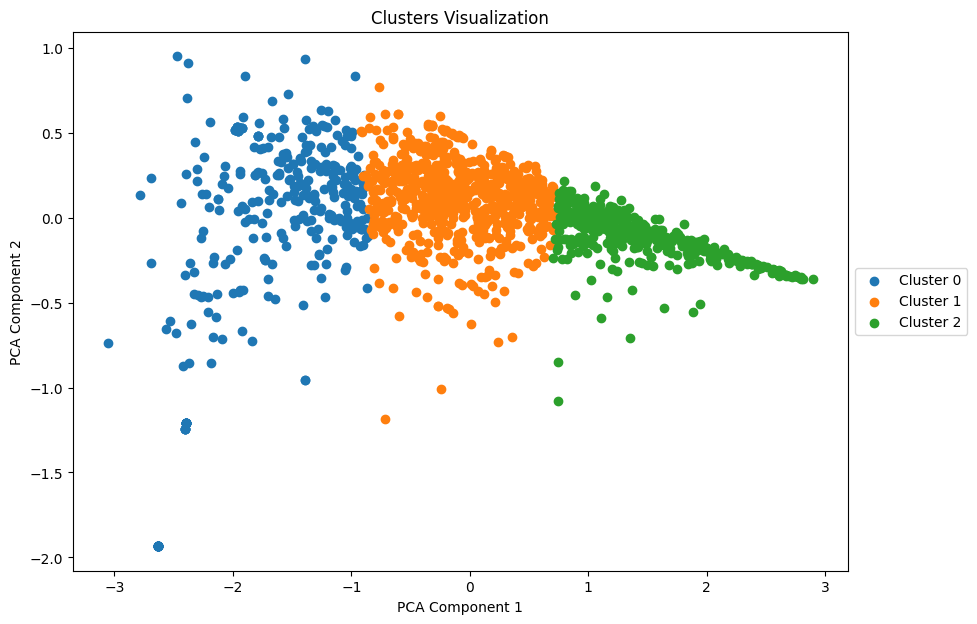

In [227]:
# KMeans 클러스터링
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 클러스터 개수 설정
num_clusters = 3

# KMeans 모델 훈련
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(doc_vectors)

# 클러스터링 결과를 데이터프레임에 추가
df_clustered = df_clustering.copy()  # 원본 데이터프레임 복사
df_clustered['cluster'] = labels  # 클러스터 번호 추가

# 클러스터의 중심을 시각화하기 위해 PCA로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(doc_vectors)

# 클러스터 시각화
plt.figure(figsize=(10, 7))
for i in range(num_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')

plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 범례를 맨 오른쪽에 배치
plt.show()

In [212]:
from sklearn.metrics import silhouette_score

# 실루엣 계수 계산
silhouette_avg = silhouette_score(doc_vectors, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.46991947293281555


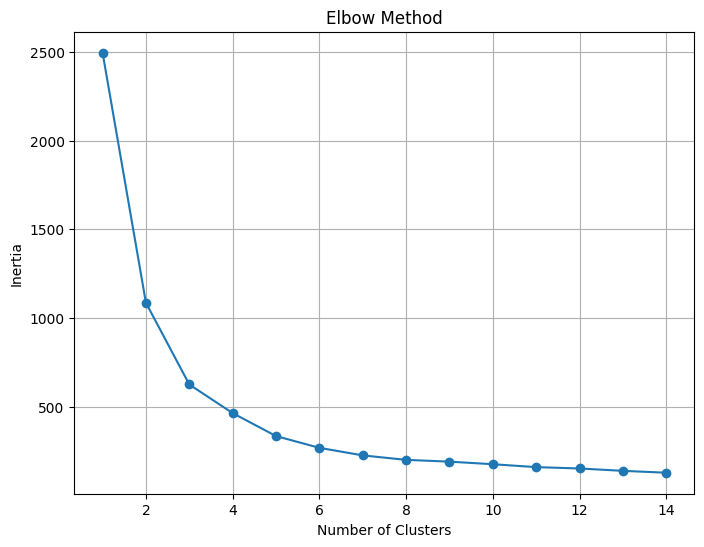

In [213]:
# 엘보우 방법을 위한 KMeans 모델 훈련
inertia = []
k_range = range(1, 15)  # 1부터 10까지 클러스터 개수로 실험

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(doc_vectors)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#**4. 클러스터링 결과를 눈으로 확인**

In [219]:
# 클러스터 번호대로 매물들을 정렬

df_clustered

,url,combined_text,tokens,cluster
0,https://web.joongna.com/product/196002064,로지텍 g913 tkl wasd는 까짐있어서 영문판으로 바꿨습니다 덮개는 미사용입니...,"[로지텍, g913, tkl, wasd는, 까짐있어서, 영문판으로, 바꿨습니다, 덮...",2
1,https://web.joongna.com/product/196002101,커세어 도미네이터 플래티넘 64GB(4x16GB) DD... 24.2.11에 구매했...,"[커세어, 도미네이터, 플래티넘, 64GB, (, 4x16GB, ), DD, ......",1
2,https://web.joongna.com/product/196002072,특가 인텔 I5 9400F+1660super+16G+2... 인텔 가성비 좋은 게이...,"[특가, 인텔, I5, 9400F+1660super+16G+2, ..., 인텔, 가...",1
3,https://web.joongna.com/product/196002147,스틸시리즈 노바 7X 화이트 무선 헤드셋 2024년 9월 8일 쿠팡 국내 정품 구매...,"[스틸시리즈, 노바, 7X, 화이트, 무선, 헤드셋, 2024년, 9월, 8일, 쿠...",1
4,https://web.joongna.com/product/196002200,인텔 NUC10i5FNK i5-10210U/32GB/2... 모델: 인텔 NUC10...,"[인텔, NUC10i5FNK, i5-10210U/32GB/2, ..., 모델, :,...",0
...,...,...,...,...
1456,https://web.joongna.com/product/196036941,윈도우11/10 MS오피스365 2021 2019 20... - 8434 - 211...,"[윈도우11/10, MS오피스365, 2021, 2019, 20, ..., -, 8...",0
1457,https://web.joongna.com/product/196036937,LG모니터 24MP47HQ 모니터 스탠드 구해봅니다 LG모니터 24MP47HQ 모니...,"[LG모니터, 24MP47HQ, 모니터, 스탠드, 구해봅니다, LG모니터, 24MP...",2
1458,https://web.joongna.com/product/196036755,리전프로 16인치 4070 올해 9월경 구매하였습니다. 하루 두시간 미만으로 사용해...,"[리전프로, 16인치, 4070, 올해, 9월경, 구매하였습니다, ., 하루, 두시...",1
1459,https://web.joongna.com/product/196036973,아콘 AK74 메카닉 경해축 fr4 단순개봉 프리플로우 아콘 AK74 경해축 fr4...,"[아콘, AK74, 메카닉, 경해축, fr4, 단순개봉, 프리플로우, 아콘, AK7...",2


In [228]:
# 두 데이터프레임을 'title' 컬럼을 기준으로 병합 (인덱스를 기준으로)
df_clustered = pd.concat([df_clustered, df_text_removed[['title']]], axis=1)

# 'combined_text'와 'tokens' 컬럼을 제거한 새로운 데이터프레임 df_final 생성
df_final = df_clustered.drop(columns=['combined_text', 'tokens'])

df_final

,url,cluster,title
0,https://web.joongna.com/product/196002064,2,로지텍 g913 tkl 판매
1,https://web.joongna.com/product/196002101,1,커세어 도미네이터 플래티넘 64GB(4x16GB) DD...
2,https://web.joongna.com/product/196002072,1,특가 인텔 I5 9400F+1660super+16G+2...
3,https://web.joongna.com/product/196002147,1,스틸시리즈 노바 7X 화이트 무선 헤드셋 판매합니다.
4,https://web.joongna.com/product/196002200,0,인텔 NUC10i5FNK i5-10210U/32GB/2...
...,...,...,...
1456,https://web.joongna.com/product/196036941,0,윈도우11/10 MS오피스365 2021 2019 20...
1457,https://web.joongna.com/product/196036937,2,LG모니터 24MP47HQ 모니터 스탠드 구해봅니다
1458,https://web.joongna.com/product/196036755,1,리전프로 16인치 4070
1459,https://web.joongna.com/product/196036973,2,아콘 AK74 메카닉 경해축 fr4 단순개봉


In [242]:
# 클러스터별로 무작위로 3개씩 행을 뽑아 출력
for i in range(df_final['cluster'].nunique()):  # 클러스터 개수만큼 반복
    cluster_data = df_final[df_final['cluster'] == i]

    # 무작위로 3개 데이터 샘플링
    sample_data = cluster_data.sample(n=min(3, len(cluster_data)), random_state=74)  # 클러스터 데이터 수가 3 미만일 경우 처리

    # 출력
    print(f"--- Cluster {i} - Random 3 Samples ---")
    print(sample_data.reset_index(drop=True))  # 인덱스를 초기화하여 출력
    print("\n" + "-"*40 + "\n")

--- Cluster 0 - Random 3 Samples ---
                                         url  cluster  \
0  https://web.joongna.com/product/196034624        0   
1  https://web.joongna.com/product/196030586        0   
2  https://web.joongna.com/product/196023648        0   

                               title  
0                 HP cq60 AMD 처분합니다.  
1      M삼성노트북 인텔Core 15형/큰화면/SSD/화이트  
2  삼성 갤럭시북3 360 NT750QFG-KM58S (S...  

----------------------------------------

--- Cluster 1 - Random 3 Samples ---
                                         url  cluster  \
0  https://web.joongna.com/product/193000459        1   
1  https://web.joongna.com/product/196006378        1   
2  https://web.joongna.com/product/196016533        1   

                               title  
0                            7800x3d  
1  MSI Z490 GAMING EDGE Wifi (박스포...  
2                      neo70 커스텀 키보드  

----------------------------------------

--- Cluster 2 - Random 3 Samples ---
                                 